In [5]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
from collections import defaultdict
from Geometry3D import *
import copy
import random
from scipy.stats import truncnorm
from scipy.stats import bernoulli
import math
import shapely
from shapely.geometry import Point as pointpoint
from shapely.geometry.polygon import Polygon as polygonpolygon
from shapely.geometry import MultiPolygon
import shapely.geometry as sg
import pandas as pd
import time
import json
epsilon = 10e-7

# Initial population (n=10)

In [6]:
poly_init = [[[[0, 0], [3, 3], [0, 3], 0, 1], 
         [[0, 0], [3, 3], [2, 0], 0, 1], 
         [[2, 0], [3, 3], [5, 0], 0, 3],
         [[5, 3], [3, 3], [5, 0], 0, 3], 
         [[0, 0], [5, 3], [1, 3], 1, 2], 
         [[0, 0], [1, 3], [0, 3], 1, 0],
         [[0, 0], [5, 0], [5, 3], 1, 2]], 
        [[[0, 0], [2, 3], [0, 3], 0, 1], 
         [[0, 0], [2, 3], [3, 0], 0, 1], 
         [[2, 3], [3, 0], [5, 3], 0, 2], 
         [[3, 0], [4, 0], [5, 3], 0, 2],
         [[4, 0], [5, 3], [5, 0], 0, 0],
         [[0, 0], [0, 3], [4, 3], 1, 3], 
         [[0, 0], [4, 3], [3, 0], 1, 3], 
         [[3, 0], [4, 3], [5, 0], 1, 0], 
         [[5, 0], [4, 3], [5, 3], 1, 0]],
        [[[0, 0], [0, 2], [4.5, 2], 0, 3],
         [[0, 2], [0, 3], [4.5, 2], 0, 1],
         [[0, 0], [4, 0], [4.5, 2], 0, 3], 
         [[4, 0], [5, 0], [4.5, 2], 0, 0],
         [[5, 0], [4.5, 2], [5, 3], 0, 0],
         [[0, 3], [4.5, 2], [5, 3], 0, 1], 
         [[0, 0], [2, 3], [0, 1], 1, 2], 
         [[0, 1], [2, 3], [0, 3], 1, 0],
         [[0, 0], [2, 0], [2, 3], 1, 2], 
         [[2, 0], [2, 3], [5, 0], 1, 2],
         [[5, 0], [2, 3], [5, 1], 1, 2],
         [[5, 1], [2, 3], [5, 3], 1, 0]],
        [[[0, 0], [5, 0], [0, 1], 0, 1], 
         [[0, 1], [5, 0], [5, 3], 0, 1], 
         [[0, 1], [0, 3], [5, 3], 0, 0],
         [[0, 0], [0, 3], [3, 3], 1, 2], 
         [[0, 0], [3, 0], [3, 1], 1, 0],
         [[0, 0], [3, 1], [3, 3], 1, 2],
         [[3, 0], [5, 3], [3, 1], 1, 3], 
         [[3, 1], [3, 3], [5, 3], 1, 3],
         [[3, 0], [5, 0], [5, 3], 1, 3]],
        [[[0, 0], [2, 0], [2, 3], 0, 1], 
         [[0, 0], [0, 3], [2, 3], 0, 1], 
         [[2, 0], [2, 3], [5, 1], 0, 2], 
         [[2, 0], [5, 0], [5, 1], 0, 0], 
         [[2, 3], [5, 3], [5, 1], 0, 2], 
         [[0, 0], [2, 3], [0, 3], 1, 3], 
         [[0, 0], [3, 1], [2, 3], 1, 3],
         [[0, 0], [3, 1], [5, 0], 1, 0],
         [[3, 1], [2, 3], [5, 3], 1, 0],
         [[3, 1], [5, 0], [5, 3], 1, 0]],
        [[[0, 0], [5, 1], [0, 1], 0, 1], 
         [[0, 0], [4.5, 0], [5, 1], 0, 1], 
         [[4.5, 0], [5, 0], [5, 1], 0, 0],
         [[0, 1], [0, 3], [1, 3], 0, 0], 
         [[0, 1], [1, 3], [5, 1], 0, 2], 
         [[1, 3], [5, 1], [5, 3], 0, 2], 
         [[0, 0], [1, 0], [0, 3], 1, 0],
         [[1, 0], [5, 0], [0, 3], 1, 3],
         [[0, 3], [5, 0], [5, 3], 1, 3]],
        [[[0, 0], [5, 3], [5, 0], 0, 1], 
         [[0, 0], [0, 3], [5, 3], 0, 1], 
         [[0, 2.5], [2, 3], [0, 3], 1, 3], 
         [[0, 0], [0, 2.5], [2, 2.5], 1, 0],
         [[0, 2.5], [2, 3], [2, 2.5], 1, 3],
         [[2, 3], [3, 3], [2, 2.5], 1, 0],
         [[2, 0], [4, 0], [2, 2.5], 1, 2],
         [[0, 0], [2, 0], [2, 2.5], 1, 0],
         [[2, 2.5], [4, 0], [3, 3], 1, 2],
         [[4, 0], [3, 3], [5, 3], 1, 2],
         [[4, 0], [5, 3], [5, 0], 1, 0]],
        [[[0, 0], [0, 3], [1, 3], 0, 0], 
         [[0, 0], [1, 3], [3, 0], 0, 1],
         [[1, 3], [3, 0], [3, 3], 0, 1], 
         [[3, 0], [5, 0], [3, 3], 0, 3], 
         [[3, 3], [5, 0], [5, 3], 0, 3], 
         [[0, 0], [5, 2], [0, 3], 1, 2], 
         [[0, 0], [5, 0], [5, 2], 1, 2], 
         [[0, 3], [5, 2], [5, 3], 1, 0]],
        [[[0, 0], [3, 3], [0, 3], 0, 0], 
         [[0, 0], [3, 3], [4, 0], 0, 0], 
         [[3, 3], [4, 0], [5, 3], 0, 1], 
         [[4, 0], [5, 3], [5, 0], 0, 1], 
         [[0, 0], [0, 2], [5, 0], 1, 3], 
         [[0, 2], [5, 0.5], [5, 1], 1, 0], 
         [[0, 2], [5, 0.5], [5, 0], 1, 3],
         [[0, 2], [5, 1], [5, 3], 1, 2], 
         [[0, 2], [0, 3], [5, 3], 1, 2]],
        [[[0, 0], [2, 3], [0, 3], 0, 1], 
         [[0, 0], [2, 3], [3, 0], 0, 1], 
         [[2, 3], [3, 0], [3, 3], 0, 2], 
         [[3, 3], [3, 0], [5, 3], 0, 2], 
         [[3, 0], [5, 3], [5, 0], 0, 2],
         [[0, 0], [1, 3], [0, 3], 1, 0], 
         [[0, 0], [1, 3], [5, 0], 1, 3], 
         [[5, 3], [1, 3], [5, 0], 1, 3]]]     

# Predefined volumes of spaces (for objective 2)

In [9]:
#Entering of the required volumes

req_volumes = list(map(int,input('Please enter the values of the required volumes separated by a space ').split()))

Please enter the values of the required volumes separated by a space 100 5 30


# Size of volume V inside which the building is located

In [8]:
#Entering of the required length and width

parameters = list(map(float,input('Please enter the maximum length, width and height separated by a space (meters): ').split()))

Please enter the maximum length, width and height separated by a space (meters): 5 3 2


# Minimal allowed angle

In [10]:
#Entering of the minimal angle in degrees

minangle = int(input('Please enter the minimal allowable angle (degrees): '))

Please enter the minimal allowable angle (degrees): 50


# Dictionary of heights

In [11]:
# HEIGHTS

heights = defaultdict()
heights[0] = 1
heights[1] = 1

In [12]:
# FULL HEIGHT

def full_height(poly):
    s = 0
    for i in range(nlevels(poly)):
        s = s + heights[i]
    return s

# Useful functions

## Parallelism

In [23]:
#Binary function that 
#- returns "True" if edges are parallel or coincide
#- returns "False" if not

# a = [7/3, 1, 2, 0, 0, 1]
# b = [2, 0, 0, 1, 0, 2]

def parallelism(a, b):
    
    if np.abs((a[0] - a[2])*(b[1] - b[3]) - (a[1] - a[3])*(b[0] - b[2])) < epsilon:
        
        return True
    
    else:
        
        return False

## Edges intersection

In [25]:
#Intersection point of two edges or their continuations

#a = [3, 3, 0, 1, 0, 1]
#b = [2, 1, 1, 1, 0, 2]

def edges_intersection(a, b):
    
    return [((a[0]*a[3] - a[1]*a[2])*(b[0] - b[2])-(a[0] - a[2])*(b[0]*b[3] - b[1]*b[2]))/ \
            ((a[0] - a[2])*(b[1] - b[3])-(a[1]-a[3])*(b[0] - b[2])), \
            (((a[0]*a[3] - a[1]*a[2])*(b[1] - b[3])-(a[1] - a[3])*(b[0]*b[3] - b[1]*b[2]))/ \
            ((a[0] - a[2])*(b[1] - b[3])-(a[1]-a[3])*(b[0] - b[2])))]

## Do two edges intersect in the interior

In [3]:
#Binary function that
#- returns "True" if edges a and b are not parallel and intersect in the interior of any of edges
#- returns "False" if edges are parallel or don't intersection or it's intersection - common vertex 

# a = [4, 2, 5, 3, 3, 0] 
# b = [2.3476259661391095, 1.026174593643856, 5, 3, 3, 6]

def intersection_inmid(a, b):

    if parallelism(a, b) == True:
        
        return False
    
    else:
        
        #p - intersection of edges'cintinuations
        p = edges_intersection(a, b)

        if (((p[0] - a[0] > epsilon) and (a[2] - p[0] > epsilon)) or ((a[0] - p[0] > epsilon) and (p[0] - a[2] > epsilon)) or\
            ((np.abs(p[0] - a[0]) < epsilon) and (np.abs(p[0] - a[2]) < epsilon))) and\
    (((p[0] - b[0] > epsilon) and (b[2] - p[0] > epsilon)) or ((b[0] - p[0] > epsilon) and (p[0] - b[2] > epsilon)) or\
     ((np.abs(p[0] - b[0]) < epsilon) and (np.abs(p[0] - b[2]) < epsilon))) and\
    (((p[1] - a[1] > epsilon) and (a[3] - p[1] > epsilon)) or ((a[1] - p[1] > epsilon) and (p[1] - a[3] > epsilon)) or\
     ((np.abs(p[1] - a[1]) < epsilon) and (np.abs(p[1] - a[3]) < epsilon))) and\
    (((p[1] - b[1] > epsilon) and (b[3] - p[1] > epsilon)) or ((b[1] - p[1] > epsilon) and (p[1] - b[3] > epsilon)) or\
     ((np.abs(p[1] - b[1]) < epsilon) and (np.abs(p[1] - b[3]) < epsilon))):
            
            return True
        
        else:
            
            return False

## Number of levels

In [2]:
#Number of unique levels including 0

def nlevels(poly):
    return len(np.unique([i[3] for i in poly]))

## Number of spaces

In [13]:
#Number of non-zero spaces in poly

def nspaces(poly):
    
    #list_spaces: [1 2 3]
    list_spaces = np.unique([i[4] for i in poly])

    if 0 in list_spaces:
        nspaces = len(list_spaces) - 1
    else:
        nspaces = len(list_spaces)
    
    return nspaces

## Dictionary: key - level,  values - all vertices for each space

In [14]:
def v(poly):
    v = defaultdict(list)
    for i in range(nlevels(poly)):
        for j in poly:
            if j[3] == i:
                if [x for y in [j[0], [i], [j[4]]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[0], [i], [j[4]]] for x in y])
                if [x for y in [j[1], [i], [j[4]]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[1], [i], [j[4]]] for x in y])
                if [x for y in [j[2], [i], [j[4]]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[2], [i], [j[4]]] for x in y])
    return v

In [15]:
#unique vertices on the level

def unique_v(poly):
    v = defaultdict(list)
    for i in range(nlevels(poly)):
        for j in poly:
            if j[3] == i:
                if [x for y in [j[0], [i]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[0], [i]] for x in y])
                if [x for y in [j[1], [i]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[1], [i]] for x in y])
                if [x for y in [j[2], [i]] for x in y] not in v[i]:
                    v[i].append([x for y in [j[2], [i]] for x in y])
    return v

## Dictionary of edges 

In [16]:
def e(poly):
    e = defaultdict(list)
    for i in range(nlevels(poly)):
        for j in poly:
            if j[3] == i:
                if ([j[0], j[1], i, j[4]] not in e[i]) and ([j[1], j[0], i, j[4]] not in e[i]):
                    e[i].append([x for y in [j[0], j[1], [i], [j[4]]] for x in y])
                if ([j[1], j[2], i, j[4]] not in e[i]) and ([j[2], j[1], i, j[4]] not in e[i]):
                    e[i].append([x for y in [j[1], j[2], [i], [j[4]]] for x in y])
                if ([j[0], j[2], i, j[4]] not in e[i]) and ([j[2], j[0], i, j[4]] not in e[i]):
                    e[i].append([x for y in [j[0], j[2], [i], [j[4]]] for x in y])
    return e

In [18]:
#unique edges on the level

def unique_e(poly):
    
    e = defaultdict(list)
    
    #i - level including zero and maximal level
    for i in range(nlevels(poly)):
        
        #j - cell on level i
        for j in poly:
            if j[3] == i:
                
                #To key i we add value [0, 0, 2, 0, level] if it's not already in e
                if ([x for y in [j[0], j[1], [i]] for x in y] not in e[i]) and ([x for y in [j[1], j[0], [i]] for x in y] not in e[i]):
                    e[i].append([x for y in [j[0], j[1], [i]] for x in y])
                if ([x for y in [j[1], j[2], [i]] for x in y] not in e[i]) and ([x for y in [j[2], j[1], [i]] for x in y] not in e[i]):
                    e[i].append([x for y in [j[1], j[2], [i]] for x in y])
                if ([x for y in [j[0], j[2], [i]] for x in y] not in e[i]) and ([x for y in [j[2], j[0], [i]] for x in y] not in e[i]):
                    e[i].append([x for y in [j[0], j[2], [i]] for x in y])
    return e

## Dictionary: key - space number, value -  cells belonging to the space

In [19]:
def spaces_cells(poly):
    s = defaultdict(list)
    for i in range(nspaces(poly)+1):
        for j in poly:
            if j[4] == i:
                s[i].append(j)
    return s

## Dictionary: key - spaces, values - all its edges (not unique)

In [21]:
def spaces_edges(poly):
    
    #s - return of the function:  space 3: edges [[0, 0, 1, 0, 1, 3], ...]
    s = defaultdict(list)
    
    #i goes through all occuring space numbers
    for i in np.unique([u[4] for u in poly]):

        #j - cells related to space i
        for j in poly:
            if j[4] == i:
                
                s[i].append([x for y in [j[0], j[1], [j[3]], [i]] for x in y])
                s[i].append([x for y in [j[1], j[2], [j[3]], [i]] for x in y])
                s[i].append([x for y in [j[0], j[2], [j[3]], [i]] for x in y])
        
    return s

## Dictionary: key - spaces, value - all external edges on each level

In [27]:
def ext_edges_spaces(poly):
    
    #s - space 3: edges [[0, 0, 1, 0, 1, 3], ...]
    s = spaces_edges(poly)
    
    #k - space number
    for k in s:
            
        #List of indices - internal edges of space k, i.e. edges which occur more than once 
        r = []
            
        #i, j  - two different edges in space k
        for i in range(len(s[k])):
            for j in range(len(s[k])):
                if i<j:

                    #If i = j or just vertices are swapped (the edge occured twice) => add i and j to "bad" indices 
                    if ((np.abs(s[k][i][0] - s[k][j][0]) < epsilon) and (np.abs(s[k][i][1] - s[k][j][1]) < epsilon) and\
                    (np.abs(s[k][i][2] - s[k][j][2]) < epsilon) and (np.abs(s[k][i][3] - s[k][j][3]) < epsilon) and\
                    (np.abs(s[k][i][4] - s[k][j][4]) < epsilon) and (np.abs(s[k][i][5] - s[k][j][5]) < epsilon)) or \
                    ((np.abs(s[k][i][0] - s[k][j][2]) < epsilon) and (np.abs(s[k][i][1] - s[k][j][3]) < epsilon) and\
                    (np.abs(s[k][i][2] - s[k][j][0]) < epsilon) and (np.abs(s[k][i][3] - s[k][j][1]) < epsilon) and\
                    (np.abs(s[k][i][4] - s[k][j][4]) < epsilon) and (np.abs(s[k][i][5] - s[k][j][5]) < epsilon)):
                        r.append(i)
                        r.append(j)
            
        #Delete all internal edges from the list
        s[k] = np.delete(s[k], r, axis = 0)
            
        #List of indices - edges which continue each other ("bad") and should be replaces with one edge 
        r = []
            
        #v, u - two not "bad" parallel external edges
        for v in range(len(s[k])):
            for u in range(len(s[k])):
                if (v < u) and (parallelism(s[k][v], s[k][u]) == True) and (u not in r) and (v not in r):
                        
                    #Four possible option for parallel edges to continue each other (one vertex must coincide)
                    if ((np.abs(s[k][u][0] - s[k][v][0]) < epsilon) and (np.abs(s[k][u][1] - s[k][v][1]) < epsilon) and
                        (np.abs(s[k][u][4] - s[k][v][4]) < epsilon) and (np.abs(s[k][u][5] - s[k][v][5]) < epsilon)) :

                        #Add good big edge
                        s[k] = np.vstack((s[k], [s[k][v][2], s[k][v][3], s[k][u][2], s[k][u][3], s[k][v][4], s[k][v][5]]))
                            
                        #Add "bad"edges to list r for removal 
                        r.append(u)
                        r.append(v)
                            
                    elif ((np.abs(s[k][u][0] - s[k][v][2]) < epsilon) and (np.abs(s[k][u][1] - s[k][v][3]) < epsilon) and\
                          (np.abs(s[k][u][4] - s[k][v][4]) < epsilon) and (np.abs(s[k][u][5] - s[k][v][5]) < epsilon)):
                            
                        s[k] = np.vstack((s[k], [s[k][v][0], s[k][v][1], s[k][u][2], s[k][u][3], s[k][v][4], s[k][v][5]]))
                        r.append(u)
                        r.append(v)
                            
                    elif ((np.abs(s[k][u][2] - s[k][v][2]) < epsilon) and (np.abs(s[k][u][3] - s[k][v][3]) < epsilon) and\
                          (np.abs(s[k][u][4] - s[k][v][4]) < epsilon) and (np.abs(s[k][u][5] - s[k][v][5]) < epsilon)):
                            
                        s[k] = np.vstack((s[k], [s[k][v][0], s[k][v][1], s[k][u][0], s[k][u][1], s[k][v][4], s[k][v][5]]))
                        r.append(u)
                        r.append(v)
                            
                    elif ((np.abs(s[k][u][2] - s[k][v][0]) < epsilon) and (np.abs(s[k][u][3] - s[k][v][1]) < epsilon) and\
                          (np.abs(s[k][u][4] - s[k][v][4]) < epsilon) and (np.abs(s[k][u][5] - s[k][v][5]) < epsilon)):
                        
                        s[k] = np.vstack((s[k], [s[k][v][2], s[k][v][3], s[k][u][0], s[k][u][1], s[k][v][4], s[k][v][5]]))
                        r.append(u)
                        r.append(v)
            
        #Delete all extra edges
        s[k] = np.delete(s[k], r, axis = 0)
        
    return s

## Dictionary: key - level, value - cells located on the level

In [29]:
def spacesbylevel(poly):
    s = defaultdict(list)
    for i in range(nlevels(poly)):
        for j in poly:
            if j[3] == i:
                s[i].append(j)
    return s

# Visualization

In [32]:
#Vizualization of one building design

def vis_poly(poly):
    n = 1
    colors = ['white', 'thistle', 'cornflowerblue', "skyblue", "pink", "mediumslateblue", "lightseagreen", 'plum', 'lightsteelblue', 'paleturquoise']

    for l in range(nlevels(poly)):

        plt.figure(figsize=(5,7))
        plt.subplot(int(str(nlevels(poly)) + str(1) + str(n)))

        m = 0

        #A = all cells on level l 
        A = []
        for i in poly:
            if i[3] == l:
                m+=1
                A.append(i)


        for t in range(nspaces(poly)+1):

            #r - list of polygons 
            r = []
            for i in range(len(A)):
                if A[i][4] == t:
                    r.append(sg.Polygon([(A[i][0][0], A[i][0][1]), (A[i][1][0], A[i][1][1]), (A[i][2][0], A[i][2][1])]))


            new_shape = MultiPolygon(r)

            for geom in new_shape.geoms:    
                xs, ys = geom.exterior.xy   
                plt.plot(xs, ys, color = 'k')
                plt.fill(xs, ys, facecolor= colors[t], edgecolor = 'black')
                plt.ylabel('Level ' + str(l))
                
            
        plt.show()
        n += 1
    plt.show()

In [33]:
#Vizualization of the whole population (n=10)

def visualize(poly):
    f, axis = plt.subplots(4, 5)
    f.set_figwidth(30)
    f.set_figheight(15)
    
    for j in range(len(poly)):

        n = 1
        colors = ['white', 'thistle', 'cornflowerblue', "skyblue", "pink", "mediumslateblue", "lightseagreen", 'plum', 'lightsteelblue', 'paleturquoise']

        for l in range(nlevels(poly[j])):

            # plt.figure(figsize=(5,7))
            # plt.subplot(int(str(nlevels(poly)) + str(1) + str(n)))

            m = 0

            #A = all cells on level l 
            A = []
            for i in poly[j]:
                if i[3] == l:
                    m+=1
                    A.append(i)


            for t in range(nspaces(poly[j])+1):

                #r - list of polygons 
                r = []
                for i in range(len(A)):
                    if A[i][4] == t:
                        r.append(sg.Polygon([(A[i][0][0], A[i][0][1]), (A[i][1][0], A[i][1][1]), (A[i][2][0], A[i][2][1])]))


                new_shape = MultiPolygon(r)

                for geom in new_shape.geoms:    
                    xs, ys = geom.exterior.xy 
                    
                    axis[1+ 2 * (j // 5), j % 5].set_title('Design' + ' '+ str(j+1), y=-0.2)
                    if (j<(len(poly))/2):  
                          axis[l, j].plot(xs, ys, color = 'k')
                          axis[l, j].plot(xs, ys, color = 'k')
                          axis[l, j].fill(xs, ys, facecolor= colors[t], edgecolor = 'black')
                          axis[l, j].set_ylabel('Level ' + str(l))
                    else: 
                          axis[l+nlevels(poly[j]), j - 5].plot(xs, ys, color = 'k')
                          axis[l+nlevels(poly[j]), j - 5].plot(xs, ys, color = 'k')
                          axis[l+nlevels(poly[j]), j - 5].fill(xs, ys, facecolor= colors[t], edgecolor = 'black')
                          axis[l+nlevels(poly[j]), j - 5].set_ylabel('Level ' + str(l))

            n += 1
    plt.show()

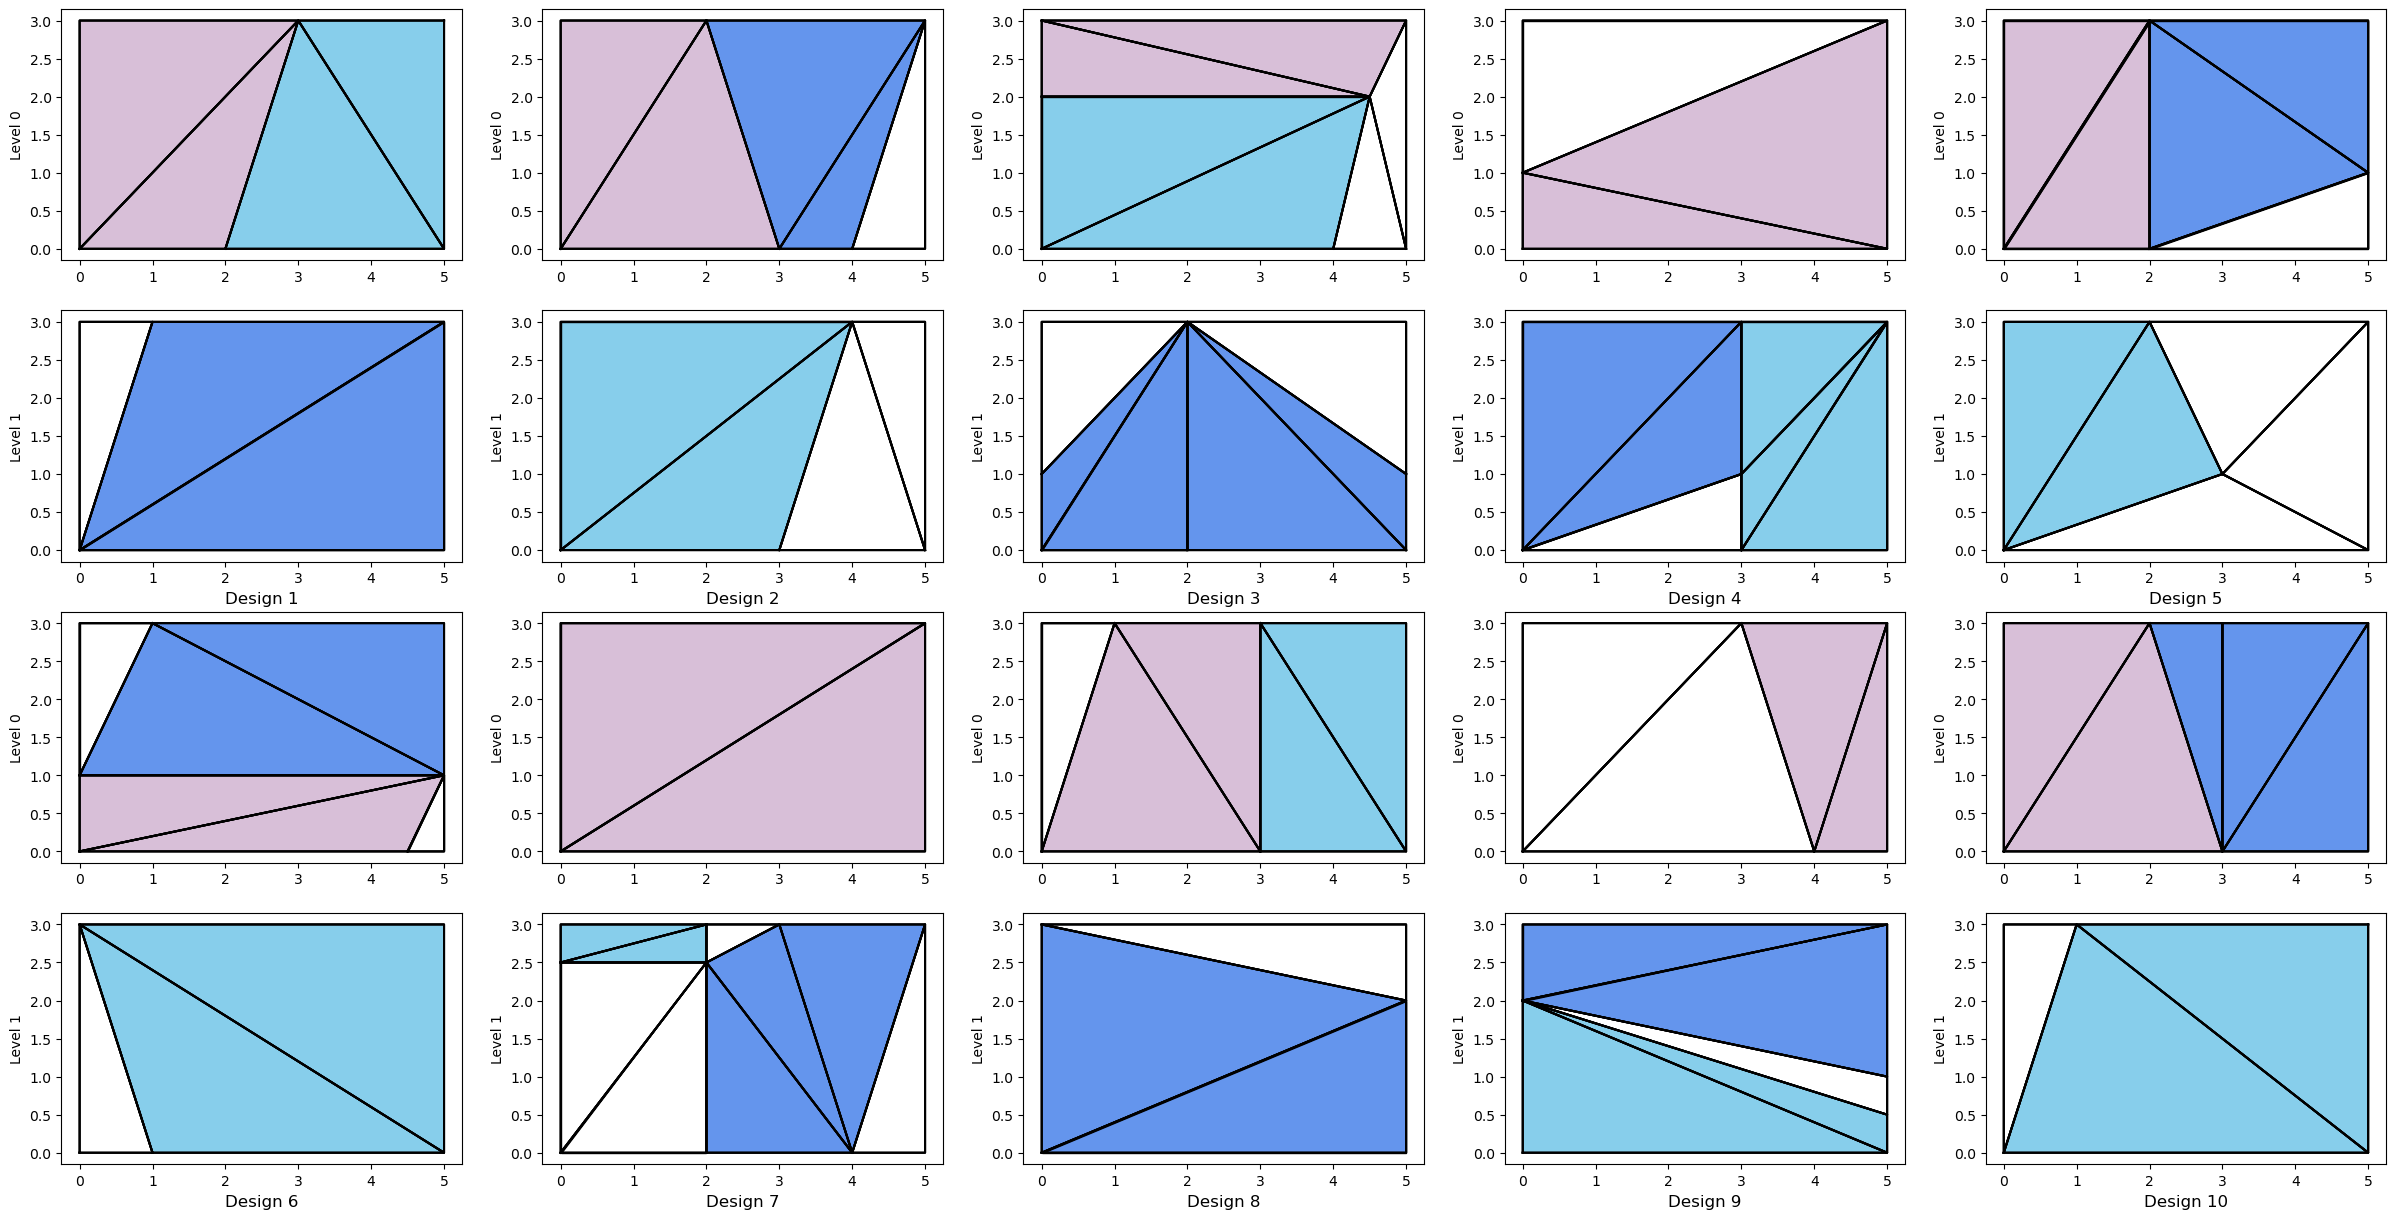

In [35]:
#Initial building designs

visualize(poly_init)

# Constraints

## C0: No duplicates and degenerate cells, all levels and spaces are present without passes

In [37]:
def C0(poly):
    
    ###Area of a traingle should be non zero 
    
    for i in poly:
        
        if np.abs(i[0][0] * (i[1][1] - i[2][1]) + i[1][0] * (i[2][1] - i[0][1]) + i[2][0] * (i[0][1] - i[1][1])) < epsilon:
            return False
    
    ###No duplicates on the same level (even with different b-values)
    
    #j - level
    for j in spacesbylevel(poly):
        
        #A = [0, 0, 2, 0, 0, 1] for cell [list([0, 0]) list([2, 0]) list([0, 1]) 0 0]
        A = []
        
        #k - space on level j 
        for k in spacesbylevel(poly)[j]:
            A.append([x for y in [k[0], k[1], k[2]] for x in y])
        
        unique, counts = np.unique(A, return_counts = True, axis=0)
        
        #All of them are supposed to be equal to 1
        if len(counts) != sum(counts):
            return False
    
    ###All levels are present without passes
    
    list_lev = np.unique([u[3] for u in poly])
    
    if max(list_lev) != nlevels(poly) - 1:
        return False
        
    ###All spaces are present without passes
    
    list_spaces = np.unique([u[4] for u in poly])
    
    if max(list_spaces) != nspaces(poly):
        return False
    
    return True

## C1: No overlaping (intersection of 2 cells can be either a point or a whole edge)

In [40]:
def C1(poly):
    for i in range(nlevels(poly)):
        
        #Each vertex should not lie inside any other cell and even on its edge 
        #Only acceptable is it coincides with vertex
        
        #k - cell [list([0, 0]) list([2, 0]) list([0, 1]) 0 0]
        for k in poly:
   
            #j - point [3, 3, 0, 1]
            for j in v(poly)[i]:
            
                #Only cells on level i            
                if k[3] == i:
                    
                    t1 = (k[0][0] - j[0]) * (k[1][1] - k[0][1]) - (k[0][1] - j[1]) * (k[1][0] - k[0][0])
                    t2 = (k[1][0] - j[0]) * (k[2][1] - k[1][1]) - (k[1][1] - j[1]) * (k[2][0] - k[1][0])
                    t3 = (k[2][0] - j[0]) * (k[0][1] - k[2][1]) - (k[2][1] - j[1]) * (k[0][0] - k[2][0])
                    
                    #The same oriantation -> point is inside
                    if ((t1 > epsilon) and (t2 > epsilon) and (t3 > epsilon)) or ((t1 < -epsilon) and (t2 < -epsilon) and (t3 < -epsilon)):

                        return False
                        
                    else:
                        
                        #Point is on the edge -> not okay if it's not on the vertex
                        #With <= 0 it would be on the continuation of the edge which is okay
                        if ((np.abs(t1) < epsilon) and (t2 * t3 >= 0)) or\
                        ((np.abs(t2) < epsilon) and (t1 * t3 >= 0)) or\
                        ((np.abs(t3) < epsilon) and (t1 * t2 >= 0)):
                            
                            #Vertex coincides with triangle vertex -> it's okay  
                            if ((np.abs(j[0] - k[0][0]) < epsilon) and (np.abs(j[1] - k[0][1]) < epsilon )) or\
                            ((np.abs(j[0] - k[1][0]) < epsilon) and (np.abs(j[1] - k[1][1]) < epsilon )) or\
                            ((np.abs(j[0] - k[2][0]) < epsilon) and (np.abs(j[1] - k[2][1]) < epsilon )):  
                                pass
                            
                            #Point is on the edge
                            else:  
                                return False
                                
        #Two edges on the same floor should not intersect each other in any of their interiors
        
        #p - edge [2, 0, 3, 3, 0, 2]
        for p in e(poly)[i]:
            
            #q - edge [3, 3, 0, 1, 0, 1]
            for q in e(poly)[i]:
                
                if intersection_inmid(p, q) == True:    
                    return False
    return True

## C2: Complete coverage

In [42]:
 def C2(poly, parameters):
    
    ###All vertices on each floor should lie within the boundaries of the building
    
    #Arrays of max/min coordinate of vertices on each level
    gxmax = []
    gxmin = []
    gymax = []
    gymin = []
    
    #i - level
    for i in v(poly):
        
        #x, y - arrays of coordinates of vertices on specific level
        x = []
        y = []
        
        for j in v(poly)[i]:
            x.append(j[0])
            y.append(j[1])
        
        #On each level max x should be equal to parameter   
        if np.abs(max(x) - parameters[0]) > epsilon:
            return False
        if np.abs(min(x)) > epsilon:
            return False
        if np.abs(max(y) - parameters[1]) > epsilon:
            return False
        if np.abs(min(y)) > epsilon:
            return False

    
    ###Complete coverage of predefined volume

    #L - list of all edges on all levels without b-value
    L = []
    for i in e(poly):
        for j in e(poly)[i]:
            L.append([j[0], j[1], j[2], j[3], j[4]])
    
    
    for i in e(poly):
        for j in e(poly)[i]:
            
            #If the edge is on the contour, it should be in L exactly 1 time
            if ( ( np.abs(j[0]) < epsilon) and (np.abs(j[2]) < epsilon)) or\
            ((np.abs(j[0] - parameters[0]) < epsilon) and (np.abs(j[2] - parameters[0]) < epsilon)) or\
            ((np.abs(j[1]) < epsilon) and (np.abs(j[3]) < epsilon)) or\
            ((np.abs(j[1] - parameters[1]) < epsilon) and (np.abs(j[3] - parameters[1]) < epsilon)):
                if (L.count([j[0], j[1], j[2], j[3], j[4]]) + L.count([j[2], j[3], j[0], j[1], j[4]])) != 1:
                    return False
            
            #If the edge is not on the contour, it should be in L exactly 2 times
            else:
                if (L.count([j[0], j[1], j[2], j[3], j[4]]) + L.count([j[2], j[3], j[0], j[1], j[4]])) != 2:
                    return False
                    
    ###We want specific height of the building
    
    #Sum all height of levels
    H = 0
    for i in heights:
        H += heights[i] 
    
    #It should be equal to the predefined height
    if (H != parameters[2]):
        return False
   
    return True

## C3: Spaces should be connected

In [45]:
def C3(poly):
    
    #i - number of the space {1, 2, ...}
    #nspaces - how many non-zero spaces are in poly. There should be at least one
    for i in range(1, nspaces(poly) + 1):
        
        ###On the same level cells with the same b-value should be connected in one dual graph component
        
        #j and k - two arbitrary cells with b=i
        for j in range(len(spaces_cells(poly)[i])):
            
            #a - flag: 
            #1 if j is near to at least one other cell k (on the same level with the same b-value); 
            #0 if not near to any
            a = 0
            
            #d - flag:
            #1 if there are at least one more cells with the same b-value on the same level
            #0 if j is the only cell
            d = 0
            
            for k in range(len(spaces_cells(poly)[i])):
                
                #Check if j and k are indices for different cells on the same level
                if (np.abs(spaces_cells(poly)[i][j][3] - spaces_cells(poly)[i][k][3]) < epsilon) and (j!=k):
                    
                    #There is at least one more cell with the same b-value on the same level as j
                    d += 1
                        
                    #Intersection of cells j and k is two vertices
                    if ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and\
                        (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and\
                     (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and\
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and\
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and\
                     (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][0][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][0][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][0][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][1][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][2][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][0][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][0][1]) < epsilon)) or \
                    ((np.abs(spaces_cells(poly)[i][j][1][0] - spaces_cells(poly)[i][k][2][0]) < epsilon) and ( np.abs(spaces_cells(poly)[i][j][1][1] - spaces_cells(poly)[i][k][2][1]) < epsilon) and \
                     (np.abs(spaces_cells(poly)[i][j][2][0] - spaces_cells(poly)[i][k][1][0]) < epsilon) and (np.abs(spaces_cells(poly)[i][j][2][1] - spaces_cells(poly)[i][k][1][1]) < epsilon)):
                        a = 1

                        
            #Cell i is the only cell on the level or it is separate from any other cell with the same b-value
            if (a == 0) and (d > 0):
                return False
                
        ###On adjacent levels external boundaries of the same space should coincide
                    
        #A - dictionary: 
        #key - level
        #value - list of vertices of external boundaries of space i on this level
        #{1: [(0, 0), (1, 0), (0, 0), (0, 3), (1, 0), (3, 3), (3, 3), (0, 3)], 2: [(0, 0), (0, 3), (0, 3), (3, 3), (3, 3), (1, 0), (1, 0), (0, 0)]})
        A = defaultdict(list)
        
        #List of levels on which space i is located
        ilev = np.unique([u[4] for u in ext_edges_spaces(poly)[i]])
        
        #Space i is located on more than 1 level
        if len(ilev) > 1:

            #Number of levels on which space i is located != max level - min level + 1, i.e. vertically not connected
            if len(ilev) != np.max(ilev) - np.min(ilev) + 1:
                return False

            #v - one of the levels on which space i is located
            for v in ilev:
                
                #w - all external boundaries of space i on level v
                for w in ext_edges_spaces(poly)[i]:
                    if w[4] == v:
                        
                        #Add vertices of external booundaires to dictionary A from edges
                        A[v].append(tuple(w[:2]))
                        A[v].append(tuple(w[2:4]))
            
            #d, r - unique couple of levels in A 
            for d in A:
                for r in A:
                    if d < r:
                        
                        #A[d] should be completely the same with A[r]
                        #collections.Counter(A[d]) - how many times each element is in A[d]
                        if collections.Counter(A[d]) != collections.Counter(A[r]): 
                            return False
    return True

## С4: Cells which have the same non-zero color value should form a convex space

In [46]:
# Order point in clockwise order

def f(origin, refvec):
    def clockwiseangle_and_distance(point):
    
        # Vector between point and the origin: v = p - o
        vector = [point[0]-origin[0], point[1]-origin[1]]
        # Length of vector: ||v||
        lenvector = math.hypot(vector[0], vector[1])
        # If length is zero there is no angle
        if lenvector == 0:
            return -math.pi, 0
        # Normalize vector: v/||v||
        normalized = [vector[0]/lenvector, vector[1]/lenvector]
        dotprod  = normalized[0]*refvec[0] + normalized[1]*refvec[1]     # x1*x2 + y1*y2
        diffprod = refvec[1]*normalized[0] - refvec[0]*normalized[1]     # x1*y2 - y1*x2
        angle = math.atan2(diffprod, dotprod)
        # Negative angles represent counter-clockwise angles so we need to subtract them 
        # from 2*pi (360 degrees)
        if angle < 0:
            return 2*math.pi+angle, lenvector
        # I return first the angle because that's the primary sorting criterium
        # but if two vectors have the same angle then the shorter distance should come first.
        return angle, lenvector
    return clockwiseangle_and_distance

In [47]:
def is_convex_polygon(polygon):
    """Return True if the polynomial defined by the sequence of 2D
    points is 'strictly convex': points are valid, side lengths non-
    zero, interior angles are strictly between zero and a straight
    angle, and the polygon does not intersect itself.

    NOTES:  1.  Algorithm: the signed changes of the direction angles
                from one side to the next side must be all positive or
                all negative, and their sum must equal plus-or-minus
                one full turn (2 pi radians). Also check for too few,
                invalid, or repeated points.
            2.  No check is explicitly done for zero internal angles
                (180 degree direction-change angle) as this is covered
                in other ways, including the `n < 3` check.
    """
    try:# needed for any bad points or direction changes
        # Check for too few points
        if len(polygon) < 3:
#             print("0")
            return False
        # Get starting information
        old_x, old_y = polygon[-2]
        new_x, new_y = polygon[-1]
        new_direction = math.atan2(new_y - old_y, new_x - old_x)
        angle_sum = 0.0
        # Check each point (the side ending there, its angle) and accum. angles
        for ndx, newpoint in enumerate(polygon):
            # Update point coordinates and side directions, check side length
            old_x, old_y, old_direction = new_x, new_y, new_direction
            new_x, new_y = newpoint
            new_direction = math.atan2(new_y - old_y, new_x - old_x)
            if old_x == new_x and old_y == new_y:
#                 print("1")
                return False  # repeated consecutive points
            # Calculate & check the normalized direction-change angle
            angle = new_direction - old_direction
            if angle <= -math.pi:
                angle += math.pi*2  # make it in half-open interval (-Pi, Pi]
            elif angle > math.pi:
                angle -= math.pi*2
            if ndx == 0:  # if first time through loop, initialize orientation
                if angle == 0.0:
#                     print("2")
                    return False
                orientation = 1.0 if angle > 0.0 else -1.0
            else:  # if other time through loop, check orientation is stable
                if orientation * angle <= 0.0:  # not both pos. or both neg.
#                     print("3")
                    return False
            # Accumulate the direction-change angle
            angle_sum += angle
            
        # Check that the total number of full turns is plus-or-minus 1
        
        return abs(round(angle_sum / (math.pi*2))) == 1
    except (ArithmeticError, TypeError, ValueError) as e:
        raise e
        return False  # any exception means not a proper convex polygon

In [48]:
def C4(poly):
    
    for i in range(1, nspaces(poly)+1):
        for p in range(nlevels(poly)):
            
            #s - number of external edges if space i on level p
            s = 0
            
            #A - list of all external edges of space i on level p ([0, 1, 1, 1])
            A = []

            for k in ext_edges_spaces(poly)[i]:
                if k[4] == p: 
                    s=s+1
                    A.append([k[0], k[1], k[2], k[3]])
            
            if s == 3:
                return False
            
            B = []
            for t in range(len(A)):
                if [A[t][0], A[t][1]] not in B:
                    B.append([A[t][0], A[t][1]])
                if [A[t][2], A[t][3]] not in B:
                    B.append([A[t][2], A[t][3]])
            
            if B != []:
                s0 = 0
                s1 = 0
                for k in B:
                    s0 += k[0]
                    s1 += k[1]
                    
                origin = [s0/len(B), s1/len(B)]
                refvec = [0, 1]
                
                key_func = f(origin, refvec)
                
                points = sorted(B, key=key_func)
                
                if is_convex_polygon(points) == False:
                    return False



    return True

C4(poly_init[0])

True

## C5: Spaces should be connected to the ground

In [49]:
#Polyhedron formed by space p with ordered vertices

def polyhedron(poly, p):

    ###Obtain the set of vertices of future polyhedron p
    
    #A - not unique vertices of external edges of space p [1, 2, level]
    A = []

    for a in ext_edges_spaces(poly)[p]:
        A.append([a[0], a[1], a[4]])
        A.append([a[2], a[3], a[4]])
        
    #B - unique vertices of external edges of space p [1, 2, level]
    B = np.unique(A, axis = 0)
    
    #b - list of levels in on which space p is located
    b = []
    for k in B:
        b.append(k[2])
        
    #If space p is located on one level = max(b), we create a polyhhedron with coordinates [max(b), max(b) + 1]
    if max(b) == min(b):
                
        points_low = [[i[0], i[1], i[2]] for i in B] 
        points_high = [[i[0], i[1], i[2]+1] for i in B]
        
    else:
        
        points_low = [[i[0], i[1], i[2]+1] for i in B if (i[2]==max(b))]
        points_high = [[i[0], i[1], i[2]] for i in B if (i[2]==min(b))]
        
    s0 = 0
    s1 = 0
    for k in points_low:
        s0 += k[0]
        s1 += k[1]
    origin = [s0/len(points_low), s1/len(points_low)]
    refvec = [0, 1]
                
    key_func = f(origin, refvec)
    spoints_low = sorted(points_low, key=key_func)
        
    s0 = 0
    s1 = 0
    for k in points_high:
        s0 += k[0]
        s1 += k[1]
    origin = [s0/len(points_high), s1/len(points_high)]
    refvec = [0, 1]
                
    key_func = f(origin, refvec)
    spoints_high = sorted(points_high, key=key_func)
        
    cpg = []
    cpg.append(ConvexPolygon(tuple(Point(x) for x in spoints_high)))
    cpg.append(ConvexPolygon(tuple(Point(x) for x in spoints_low)))
        
    cpg_side = []
        
    for i in range(len(spoints_low)):
        w = [spoints_high[i % len(spoints_low)], spoints_high[(i+1) % len(spoints_low)], spoints_low[(i+1) % len(spoints_low)], spoints_low[i % len(spoints_low)]]
        cpg_side.append(ConvexPolygon(tuple(Point(x) for x in w)))
        cpg.append(ConvexPolygon(tuple(Point(x) for x in w)))
            
    cph = ConvexPolyhedron(tuple(cpg))
    
    return cph

In [50]:
#Spaces intersect if they have at least one point of intersection; p, q - spaces 

def do_spaces_intersect(poly, p, q):
    
    pol_p = polyhedron(poly, p)
    pol_q = polyhedron(poly, q)
    
    inter = intersection(pol_p, pol_q)
    return inter

In [51]:
# Create a graph of connectivity of spaces

def graph_con_spaces(poly):
    
    #A = nspaces x nspaces 
    A = np.zeros([len(ext_edges_spaces(poly))-1,len(ext_edges_spaces(poly))-1], dtype=float, order='C')

    #i, j in range [1, nspaces]
    for i in range(1, nspaces(poly)+1):
        for j in range(1, nspaces(poly)+1):
            if (i<j):
                
                #If i and j intersect, then connect them in graph
                if do_spaces_intersect(poly, i, j) is not None:
                    A[i-1][j-1] = 1
                    
    G = nx.from_numpy_matrix(A)
    return G

In [52]:
#Spaces on the ground floor

def ground_spaces(poly):
    
    #a - list of ground spaces
    a = []
    
    #i - non-zero space number
    for i in ext_edges_spaces(poly):
        if i!=0:
            
            #If at least part of the space is on the ground floor, then flag = 1
            f = 0
            for j in ext_edges_spaces(poly)[i]:
                if j[4]==0:
                    f = 1
                    
            if f==1:
                a.append(i)
    return a

In [54]:
def C5(poly):
    
    #a - list of all spaces connected to all spaces on the ground floor
    a = []
    
    #h - ground space
    for h in ground_spaces(poly):
        
        #descendants returns all nodes reachable from ground space h in graph of connectivity
        a.extend(list(np.array(list(nx.algorithms.descendants(graph_con_spaces(poly), h-1)))+1) + [h])
    
    #All spaces must be in a at least once
    if len(np.unique(a)) == nspaces(poly):
        pass
    else:
        return False
    
    return True

## C6: No cavities 

In [55]:
#Do cells p and q located on the same level have common edge:
#True - they do
#False - they don't 

def do_cells_comedge(poly, p, q):
    
    #t1 - list of vertices in cell p: [[3, 3], [2.3333333333333335, 1], [0, 1]]
    t1 = [poly[p][0], poly[p][1], poly[p][2]]
    t2 = [poly[q][0], poly[q][1], poly[q][2]]
    
    #nt1 transforms couples of vertices in t1 into tuples
    nt1 = map(tuple, t1)
    nt2 = map(tuple, t2)
    
    #st1 - sets of vertices in cell p: {(0, 1), (2.3333333333333335, 1), (3, 3)}
    st1 = set(nt1)
    st2 = set(nt2)
    
    #inter - intersection of two sets of vertices
    inter = st1.intersection(st2)
    
    #Does the intersection have 2 elements, i.e. two cells have common edge
    if len(inter) == 2:
        return True
    else:
        return False

In [57]:
#List of zero cells indices on level l which have an edge on the boundary of the building

def extereme_zero_cells(poly, l):
    
    M = []
    
    for i in range(len(poly)):
        if (((poly[i][0][0] == parameters[0] and poly[i][1][0] == parameters[0]) or\
             (poly[i][0][0] == parameters[0] and poly[i][2][0] == parameters[0]) or\
             (poly[i][1][0] == parameters[0] and poly[i][2][0] == parameters[0])) or\
            ((poly[i][0][1] == parameters[1] and poly[i][1][1] == parameters[1]) or\
             (poly[i][0][1] == parameters[1] and poly[i][2][1] == parameters[1]) or\
             (poly[i][1][1] == parameters[1] and poly[i][2][1] == parameters[1])) or\
            ((poly[i][0][0] == 0 and poly[i][1][0] == 0) or \
             (poly[i][0][0] == 0 and poly[i][2][0] == 0) or \
             (poly[i][1][0] == 0 and poly[i][2][0] == 0)) or \
            ((poly[i][0][1] == 0 and poly[i][1][1] == 0) or \
             (poly[i][0][1] == 0 and poly[i][2][1] == 0) or \
             (poly[i][1][1] == 0 and poly[i][2][1] == 0))) and\
        (poly[i][4] == 0) and (poly[i][3] == l):
            M.append(i)
    
    return M

In [58]:
# List of zero cells located on level l

def zero_cells(poly, l):
    L = []
    for j in poly:
        if (j[3] == l) and (j[4] == 0):
            L.append(j)
    return L

In [60]:
def C6(poly):
    
    #l - level
    for l in range(nlevels(poly)):
        
        #A - metrix of connectivity of zero cells on level l
        A = np.zeros([len(zero_cells(poly, l)),len(zero_cells(poly, l))], dtype=float, order='C')
        for i in range(len(zero_cells(poly, l))):
            for j in range(len(zero_cells(poly, l))):
                if (i<j):
                    
                    #Two nodes in the graph will be connceted if the corresponding zero cells have a common edge
                    if do_cells_comedge(zero_cells(poly, l), i, j) == True:
                        A[i][j] = 1
                        
        #Create a graph from matrix A
        G = nx.from_numpy_matrix(A)

        
        a = []
        
        #h - indices of zero cells located on the boundary of level l in the list of all zero cells on level l
        for h in extereme_zero_cells(zero_cells(poly, l), l):
            
            #Append to a boudary zero cell with index h
            a.append([zero_cells(poly, l)[h][0], zero_cells(poly, l)[h][1], zero_cells(poly, l)[h][2]])
            
            #Append to a all zero cells on level l that are connected with edge to boundary zero cell with index h 
            for k in list(nx.algorithms.descendants(G, h)):
                a.append([zero_cells(poly, l)[k][0], zero_cells(poly, l)[k][1], zero_cells(poly, l)[k][2]])
        
        #If on level l all zero-cells are connected to the boundary zero cells, then the constraint is met
        #Otherwise it's violated
        #len(np.unique(a, axis = 0)) - number of zero cells on level l which are connceted to boudary zero cells
        if len(np.unique(a, axis = 0)) == len(zero_cells(poly, l)):
            pass
        else:
            return False
    
    return True 

## C7: No sharp angles in spaces (user inputs an angle, optional)

In [62]:
def C7(poly, minangle):
    
    #i - non-zero space
    for space in range(1, nspaces(poly)+1):
        
        #p - level
        for p in range(nlevels(poly)):
            
            #A - list of external edges of space i on level p: 
            #[] or [[2.0, 0.0, 0.0, 1.0], [0.0, 1.0, 1.0, 3.0], [1.0, 3.0, 3.0, 3.0], [2.0, 0.0, 3.0, 3.0]] 
            A = []
            
            #Counter of boudaries of space i on level p
            s = 0
            
            #k - external edges of space i on level p
            for k in ext_edges_spaces(poly)[space]:
                if k[4] == p:
                    s += 1
                    A.append([k[0], k[1], k[2], k[3]])

            #If there is a part of space i on level p:        
            B = []
            for t in range(len(A)):
                if [A[t][0], A[t][1]] not in B:
                    B.append([A[t][0], A[t][1]])
                if [A[t][2], A[t][3]] not in B:
                    B.append([A[t][2], A[t][3]])
            if B != []:
                s0 = 0
                s1 = 0
                for k in B:
                    s0 += k[0]
                    s1 += k[1]

                origin = [s0/len(B), s1/len(B)]
                refvec = [0, 1]

                key_func = f(origin, refvec)

                points = sorted(B, key=key_func)
                
                for i in range(len(points)):
                    nom = (points[(i+1) % len(points)][0] - points[i % len(points)][0]) * (points[(i-1) % len(points)][0] - points[i % len(points)][0]) +\
                    (points[(i+1) % len(points)][1] - points[i % len(points)][1]) * (points[(i-1) % len(points)][1] - points[i % len(points)][1])
                    denom = np.sqrt((points[(i+1) % len(points)][0] - points[i % len(points)][0])**2 +\
                                    (points[(i+1) % len(points)][1] - points[i % len(points)][1])**2) *\
                    np.sqrt((points[(i-1) % len(points)][0] - points[i % len(points)][0])**2 +\
                            (points[(i-1) % len(points)][1] - points[i % len(points)][1])**2)
                    angle = np.around(np.arccos(nom/denom)*180/np.pi)
                    if angle < minangle:
                        return False
     
    return True

## C8: Maximum number of triangles (technical)

In [63]:
def C8(poly, poly_init):
    if len(poly) > 1.5 * len(poly_init):
        return False
    else:
        return True

# Mutation operator

## Discrete mutation: Change color values

In [75]:
def change_sval(poly, step_size):
    
    if poly is None:
        return None
    
    #Flip happens only if randon Bernoulli variable = 1. It depends on step_size
    bern = bernoulli.rvs(size=1, p = step_size)
    if bern == 1:
    
        D = defaultdict()
        
        q = random.choice(np.unique([u[4] for u in poly]))
        
        list_spaces = np.unique([u[4] for u in poly])
            
        if q != 0:

            #l - level
            for l in range(nlevels(poly)):

                A = []
                #i - space
                for i in spaces_cells(poly):

                    if (i != 0):

                        #List of cells on level l for space i
                        K = []

                        #cells of space i
                        for j in spaces_cells(poly)[i]:
                            if j[3] == l:
                                K.append([j[0], j[1], j[2]])

                        if not K:
                            pass
                        else:
                            A.append(list([K , i]))

                D[l] = A
            
            if not D:
                return None
            
            level = random.choice([i for i in D])
            
            if D[level] is None:
                return None
            component = random.choice([i for i in D[level]])

            for i in component[:-1]:

                I = []
                surr_cells = []

                for j in i:
                    J = 0
                    for k in range(len(poly)):
                        set1 = set([tuple(v) for v in poly[k][:-2]])
                        set2 = set([tuple(u) for u in j])
                        if (poly[k][3] == level) and (poly[k][4] == component[-1]) and (set1 == set2):
                            J = k
                            I.append(J)

                for j in i:      
                    #List of indices of near cells
                    L = []
                    for k in range(len(poly)):
                        set1 = set([tuple(v) for v in poly[k][:-2]])
                        set2 = set([tuple(u) for u in j])
                        if (poly[k][3] == level) and (poly[k][4] == component[-1]) and (set1 == set2):
                            J = k
                    for k in range(len(poly)):
                        if do_cells_comedge(poly, J, k) and (poly[k][3] == level) and (k not in I):
                            L.append(k)

                    if L not in surr_cells:
                        surr_cells.append(L)

            if not [x for y in surr_cells for x in y]:
                return None

            p = len(surr_cells)
            cell_to_col = random.choices([x for y in surr_cells for x in y], k = p)

            poly1 = copy.deepcopy(poly)

            for b in cell_to_col:
                poly1[b][4] = component[-1]

            list_spaces1 = np.unique([u[4] for u in poly1])
            if (len(list_spaces1) != len(list_spaces)):
                return None

            if (C1(poly1) == False) or (C2(poly1, parameters) == False) or (C3(poly1) == False) or (C4(poly1) == False) or (C5(poly1) == False) or (C6(poly1) == False) or (C7(poly1, minangle) == False) or (C8(poly1, poly_init) == False):
                return None
        
        else:
            
            A = []
            for i in range(len(poly)):
                if poly[i][4] != 0:
                    A.append(i)
            
            f1 = random.choice(A)
            
            poly1 = copy.deepcopy(poly)

            poly1[f1][4] = 0
            
            list_spaces1 = np.unique([u[4] for u in poly1])
            if (len(list_spaces1) != len(list_spaces)):
                return None

            if (C1(poly1) == False) or (C2(poly1, parameters) == False) or (C3(poly1) == False) or (C4(poly1) == False) or (C5(poly1) == False) or (C6(poly1) == False) or (C7(poly1, minangle) == False) or (C8(poly1, poly_init) == False):
                return None

        return poly1

## Topological mutation

### What do four points form?

In [76]:
#|x1 y1 1| 
#|x2 y2 1| - determinant function
#|x3 y3 1|

def ds(p1, p2, p3):
    return np.sign(p1[0] * p2[1] + p2[0] * p3[1] + p3[0] * p1[1] - p1[1] * p2[0] - p2[1] * p3[0] - p3[1] * p1[0])

In [77]:
#Is point p4 inside the triangle p1p2p3?
#-1: no,
#0: on the side,
#1: yes

def in_triangle(p1, p2, p3, p4):
    ds123 = ds(p1, p2, p3)
    if ds123 == -ds(p1, p2, p4):
        return -1
    elif (np.abs(ds(p1, p2, p4)) < epsilon) and ((p1[0] <= p4[0] <= p2[0]) or (p2[0] <= p4[0] <= p1[0])) and ((p1[1] <= p4[1] <= p2[1]) or (p2[1] <= p4[1] <= p1[1])):

        return 0
    if ds123 == -ds(p1, p4, p3):
        return -1
    elif (np.abs(ds(p1, p4, p3)) < epsilon) and ((p1[0] <= p4[0] <= p3[0]) or (p3[0] <= p4[0] <= p1[0])) and ((p1[1] <= p4[1] <= p3[1]) or (p3[1] <= p4[1] <= p1[1])):

        return 0
    if ds123 == -ds(p4, p2, p3):
        return -1
    elif (np.abs(ds(p4, p2, p3)) < epsilon) and ((p2[0] <= p4[0] <= p3[0]) or (p3[0] <= p4[0] <= p2[0])) and ((p2[1] <= p4[1] <= p3[1]) or (p3[1] <= p4[1] <= p2[1])):
        return 0
    return 1


In [79]:
#Are 4 points a triangle/convex quadrilateral/non-convex quadrilateral? 
#[[0, 1], [0, 0], [1, 1], [2, 1]]: traingle where [2, 1] lies inside the triangle [[0, 1], [0, 0], [1, 1]] 
#4: convex quadrilateral
#-1: non-convex quadrilateral 


L = [[0, 1], [0, 0], [1, 1], [2, 1]]

def four_points(p1, p2, p3, p4):
    if in_triangle(p1, p2, p3, p4) == 0:
        return [p1, p2, p3, p4]
    elif in_triangle(p3, p4, p1, p2) == 0:
        return [p3, p4, p1, p2]
    elif in_triangle(p4, p1, p2, p3) == 0:
        return [p4, p1, p2, p3]
    elif in_triangle(p2, p3, p4, p1) == 0:
        return [p2, p3, p4, p1]
    elif (in_triangle(p1, p2, p3, p4) == 1) or (in_triangle(p4, p1, p2, p3) == 1) or (in_triangle(p3, p4, p1, p2) == 1) or (in_triangle(p2, p3, p4, p1) == 1):
#        print("non-convex quadrilateral")
        return -1
    else: 
#        print ("convex quadrileteral")
        return 4

### Diagonal flip without involving surrounding spaces 

In [83]:
def diagonal_flip(poly, step_size):
    
    if poly is None:
        return None
    #Flip happens only if randon Bernoulli variable = 1. It depends on step_size
    bern = bernoulli.rvs(size=1, p = step_size)
    if bern == 1:
        
        #A - list of convex quadrilaterals in building structure
        A = []

        #spaces_cells:
        #2: [[[5, 0], [5, 1], [2, 0], 0, 2], [[2, 0], [2.3333333333333335, 1], [5, 1], 0, 2]]

        #i - space
        for i in spaces_cells(poly):

            #k - level
            for k in range(nlevels(poly)): 

                #L - list of pairs of cells of the same sapce on the same level
                L = []

                #j and l - different indices of cells belongong to space i on level k
                for j in range(len(spaces_cells(poly)[i])):
                    for l in range(len(spaces_cells(poly)[i])):

                        if (j<l) and (spaces_cells(poly)[i][l][3] == k) and (spaces_cells(poly)[i][j][3] == k): 
                            L.append([spaces_cells(poly)[i][j], spaces_cells(poly)[i][l]])

                #If there is no space i on level k
                if not L: 
                    pass
                else:

                    #a - pair of cells of space i on level k
                    for a in L:

                        #t1 and t2 - first 3 coordinates of two cells
                        t1 = [a[0][0], a[0][1], a[0][2]]
                        t2 = [a[1][0], a[1][1], a[1][2]]

                        nt1 = map(tuple, t1)
                        nt2 = map(tuple, t2)

                        st1 = set(nt1)
                        st2 = set(nt2)

                        #inter - set of common vertices in two cells
                        inter = st1.intersection(st2)

                        #If two cells have common edge (2 vertices) then there are 4 vertices in total for two cells
                        if len(inter) == 2:

                            #un - all vertices
                            un = list(st1.union(st2))

                            #diff - two not common vertices
                            diff = list(st1.union(st2).difference(inter))

                            #If all 4 vertices form a convex quadrilateral -> add this pair of cells to A
                            if four_points(un[0], un[1], un[2], un[3]) == 4:
                                A.append([a, diff, list(inter), k, i])
                                
        if not A:
            return None
        
        #f - random convex quadrilateral 
        f = random.choice(A)

        #M - indices of cells in poly which we will delete to replace them with others
        M = []

        #p - index of cells in poly
        for p in range(len(poly)):

            #We're looking for two cells in poly coinciding with f and add their indices to M to delete later
            if (np.abs(f[0][0][0][0] - poly[p][0][0]) < epsilon) and (np.abs(f[0][0][0][1] - poly[p][0][1]) < epsilon) and\
            (np.abs(f[0][0][1][0] - poly[p][1][0]) < epsilon) and (np.abs(f[0][0][1][1] - poly[p][1][1]) < epsilon) and\
            (np.abs(f[0][0][2][0] - poly[p][2][0]) < epsilon) and (np.abs(f[0][0][2][1] - poly[p][2][1]) < epsilon) and\
            (np.abs(f[0][0][3] - poly[p][3]) < epsilon) and (np.abs(f[0][0][4] - poly[p][4]) < epsilon):
                M.append(p)
            if (np.abs(f[0][1][0][0] - poly[p][0][0]) < epsilon) and (np.abs(f[0][1][0][1] - poly[p][0][1]) < epsilon) and\
            (np.abs(f[0][1][1][0] - poly[p][1][0]) < epsilon) and (np.abs(f[0][1][1][1] - poly[p][1][1]) < epsilon) and\
            (np.abs(f[0][1][2][0] - poly[p][2][0]) < epsilon) and (np.abs(f[0][1][2][1] - poly[p][2][1]) < epsilon) and\
            (np.abs(f[0][1][3] - poly[p][3]) < epsilon) and (np.abs(f[0][1][4] - poly[p][4]) < epsilon):
                M.append(p)

        #Delete old cells
        poly = np.delete(poly, M, axis = 0)

        #Add flipped cells
        poly = np.vstack((poly, [ [f[1][0][0], f[1][0][1]], [f[1][1][0], f[1][1][1]], [f[2][0][0], f[2][0][1]], f[3], f[4]]))
        poly = np.vstack((poly, [ [f[1][0][0], f[1][0][1]], [f[1][1][0], f[1][1][1]], [f[2][1][0], f[2][1][1]], f[3], f[4]]))             
        
        if (C1(poly) == False) or (C2(poly, parameters) == False) or (C3(poly) == False) or (C4(poly) == False) or (C5(poly) == False) or (C6(poly) == False) or (C7(poly, minangle) == False) or (C8(poly, poly_init) == False):
            return None
        
        return poly

### Add vertex to the edge

In [86]:
def add_vertex_toedge(poly):
    
    if poly is None:
        return None
    #list of all unique edges in poly
    L = []
    
    #j - edge on level i
    for i in unique_e(poly):
        for j in unique_e(poly)[i]:
            L.append(j)
    
    #a - random edge in poly
    a = random.choice(L)
    
    #b - random point on edge a
    t = np.random.uniform(low=0.0, high=1.0)
    b = [a[0] + t * (a[2] - a[0]), a[1] + t * (a[3] - a[1])]
    
    #M - indices of cells in poly which we will delete to replace them with others
    M = []
    
    #i - index of cell in poly
    for i in range(len(poly)):
        
        #Looking for the cells containing edge a and adding new cells 
        if (( (np.abs(a[0] - poly[i][0][0]) < epsilon) and (np.abs(a[1] - poly[i][0][1]) < epsilon) ) or\
            ( (np.abs(a[0] - poly[i][1][0]) < epsilon) and (np.abs(a[1] - poly[i][1][1]) < epsilon) ) or\
            ( (np.abs(a[0] - poly[i][2][0]) < epsilon) and (np.abs(a[1] - poly[i][2][1]) < epsilon) )) and\
        (( (np.abs(a[2] - poly[i][0][0]) < epsilon) and (np.abs(a[3] - poly[i][0][1]) < epsilon) ) or\
         ( (np.abs(a[2] - poly[i][1][0]) < epsilon) and (np.abs(a[3] - poly[i][1][1]) < epsilon) ) or\
         ( (np.abs(a[2] - poly[i][2][0]) < epsilon) and (np.abs(a[3] - poly[i][2][1]) < epsilon) )) and\
        ( (np.abs(a[4] - poly[i][3]) < epsilon)):
 
            if ((np.abs(a[0] - poly[i][0][0]) < epsilon) and (np.abs(a[1] - poly[i][0][1]) < epsilon)):
                if ((np.abs(a[2] - poly[i][1][0]) < epsilon) and (np.abs(a[3] - poly[i][1][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][2], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][2], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
                elif ((np.abs(a[2] - poly[i][2][0]) < epsilon) and (np.abs(a[3] - poly[i][2][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][1], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][1], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
            elif ((np.abs(a[0] - poly[i][1][0]) < epsilon) and (np.abs(a[1] - poly[i][1][1]) < epsilon)):
                if ((np.abs(a[2] - poly[i][0][0]) < epsilon) and (np.abs(a[3] - poly[i][0][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][2], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][2], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
                elif ((np.abs(a[2] - poly[i][2][0]) < epsilon) and (np.abs(a[3] - poly[i][2][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][0], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][0], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
            elif ((np.abs(a[0] - poly[i][2][0]) < epsilon) and (np.abs(a[1] - poly[i][2][1]) < epsilon)) :
                if ((np.abs(a[2] - poly[i][0][0]) < epsilon) and (np.abs(a[3] - poly[i][0][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][1], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][1], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
                elif ((np.abs(a[2] - poly[i][1][0]) < epsilon) and (np.abs(a[3] - poly[i][1][1]) < epsilon)):
                    poly = np.vstack((poly, [poly[i][0], [a[0], a[1]], b, poly[i][3], poly[i][4]]))
                    poly = np.vstack((poly, [poly[i][0], [a[2], a[3]], b, poly[i][3], poly[i][4]]))
#             else:
#                 print("error")
            
            #Adding the index of cells containing edge e to M to delete it later
            M.append(i)
    
    #Deleting old cells
    poly = np.delete(poly, M, axis = 0)
    
    if (C1(poly) == False) or (C2(poly, parameters) == False) or (C3(poly) == False) or (C4(poly) == False) or (C5(poly) == False) or (C6(poly) == False) or (C7(poly, minangle) == False) or (C8(poly, poly_init) == False):
        return None

#     print(a)
    return poly


### Add vertex to the interior 

In [88]:
def add_vertex_inter(poly):
    if poly is None:
        return None
    
    #a - random cell in ply
    a = random.choice(poly)
    
    #p - random point inside cell
    # https://stackoverflow.com/questions/47410054/generate-random-locations-within-a-triangular-domain
    
    x, y = sorted([random.random(), random.random()])
    q = abs(x - y)
    s = q
    t = 0.5 * (x + y - q)
    u = 1 - 0.5 * (q + x + y)
    p = [s * a[0][0] + t * a[1][0] + u * a[2][0], s * a[0][1] + t * a[1][1] + u * a[2][1]]
    
    #M - indices of cells in poly which we will delete to replace them with others
    M = []
    
    #Looking for a cell coinciding with a and add its index to M to delete it later
    for i in range(len(poly)):
        if (np.abs(a[0][0] - poly[i][0][0]) < epsilon) and (np.abs(a[0][1] - poly[i][0][1]) < epsilon) and\
        (np.abs(a[1][0] - poly[i][1][0]) < epsilon) and (np.abs(a[1][1] - poly[i][1][1]) < epsilon) and\
        (np.abs(a[2][0] - poly[i][2][0]) < epsilon) and (np.abs(a[2][1] - poly[i][2][1]) < epsilon) and\
        (np.abs(a[3] - poly[i][3]) < epsilon) and (np.abs(a[4] - poly[i][4]) < epsilon):
            M.append(i)
    
    #Deleting old cell
    poly = np.delete(poly, M, axis = 0)
        
    #Adding new 3 cells    
    poly = np.vstack((poly, [[a[0][0], a[0][1]], [a[1][0], a[1][1]], p, a[3], a[4]]))
    poly = np.vstack((poly, [[a[2][0], a[2][1]], [a[1][0], a[1][1]], p, a[3], a[4]]))
    poly = np.vstack((poly, [[a[2][0], a[2][1]], [a[0][0], a[0][1]], p, a[3], a[4]]))
    
    if (C1(poly) == False) or (C2(poly, parameters) == False) or (C3(poly) == False) or (C4(poly) == False) or (C5(poly) == False) or (C6(poly) == False) or (C7(poly, minangle) == False) or (C8(poly, poly_init) == False):

        return None
    
    return poly

### Add vertex

In [90]:
def add_vertex(poly, step_size):
    if poly is None:
        return None
    
    #Adding happens only if randon Bernoulli variable = 1. It depends on step_size
    bern = bernoulli.rvs(size=1, p = step_size)
    if bern == 1:
        
        
        adding_type = random.random()
        if adding_type < 0.5:
            poly = add_vertex_inter(poly)
        else:
            poly = add_vertex_toedge(poly)
            
    if poly is None:
        return None
    
    if (C1(poly) == False) or (C2(poly, parameters) == False) or (C3(poly) == False) or (C4(poly) == False) or (C5(poly) == False) or (C6(poly) == False) or (C7(poly, minangle) == False) or (C8(poly, poly_init) == False):
        pass
        
        
    return poly

### Delete a vertex

In [101]:
def delete_vertex(poly, step_size):
    if poly is None:
        return None
    
    #Deleting happens only if randon Bernoulli variable = 1. It depends on step_size 
    bern = bernoulli.rvs(size=1,p = step_size)
    if bern == 1:
    
        #List of vertices that might be deleted later
        V = []

        #i - level
        for i in unique_v(poly):

            #j - vertex on level i
            for j in unique_v(poly)[i]:

                #flag_boundary = 0, if not on the building boundary
                #flag_boundary = 1, if on the building boundary
                #flag_boundary = 2, if on the building corner
                flag_boundary = 0

                #S - list of spaces incedent to the vertex j
                S = []

                #k - cell in poly
                for k in poly:

                    #if vertex j is in the cell k
                    if ((np.abs(k[0][0] - j[0]) < epsilon) and (np.abs(k[0][1] - j[1]) < epsilon) or\
                        ((np.abs(k[1][0] - j[0]) < epsilon) and (np.abs(k[1][1] - j[1]) < epsilon)) or\
                        ((np.abs(k[2][0] - j[0]) < epsilon) and (np.abs(k[2][1] - j[1]) < epsilon))) and\
                    (np.abs(k[3] - j[2]) < epsilon):

                        #Adding space number to S
                        S.append(k[4])

                        #If on the boundary -> flag_boundary = 1
                        if (( np.abs(j[0] - parameters[0]) < epsilon) and (np.abs(j[1] - parameters[1]) > epsilon) and (np.abs(j[1]) > epsilon)) or\
                        ((np.abs(j[0]) < epsilon) and (np.abs(j[1] - parameters[1]) > epsilon) and (np.abs(j[1]) > epsilon)) or\
                        ((np.abs(j[1] - parameters[1]) < epsilon) and (np.abs(j[0] - parameters[0]) > epsilon) and (np.abs(j[0]) > epsilon)) or\
                        ((np.abs(j[1]) < epsilon) and (np.abs(j[0] - parameters[0]) > epsilon) and (np.abs(j[0] - 0) > epsilon)):
                            flag_boundary = 1

                        #If on the corner -> flag_boundary = 2   
                        elif ((np.abs(j[0] - parameters[0]) < epsilon) and (np.abs(j[1] - parameters[1]) < epsilon)) or\
                        ((np.abs(j[0]) < epsilon) and (np.abs(j[1] - parameters[1]) < epsilon)) or\
                        ((np.abs(j[0] - parameters[0]) < epsilon) and (np.abs(j[1]) < epsilon)) or\
                        ((np.abs(j[0]) < epsilon) and (np.abs(j[1]) < epsilon)):
                            flag_boundary = 2
                #If on the boundary and belongs to 1 space -> add to V
                if ((flag_boundary == 1) and (len(np.unique(S)) == 1)):
                    V.append([j, flag_boundary, np.unique(S)])

                #If not on the boundary and belongs max to 2 spaces -> add to V    
                elif ((flag_boundary == 0) and ((len(np.unique(S)) == 2) or (len(np.unique(S)) == 1))):
                    V.append([j, flag_boundary, np.unique(S)])               
        
        
        if len(V) == 0:
            return None
        
        #f - random vetex which is allowed to be deleted
        f = random.choice(V)

        #List of cells we're going to delete
        M = []

        #All cells that contain f are added to M and then deleted
        for i in range(len(poly)):
            if ( (( np.abs(poly[i][0][0] - f[0][0]) < epsilon) and (np.abs(poly[i][0][1] - f[0][1]) < epsilon)) or\
                (( np.abs(poly[i][1][0] - f[0][0]) < epsilon) and (np.abs(poly[i][1][1] - f[0][1]) < epsilon)) or\
                ((np.abs(poly[i][2][0] - f[0][0]) < epsilon) and (np.abs(poly[i][2][1] - f[0][1]) < epsilon))) and\
            (np.abs(poly[i][3] - f[0][2]) < epsilon):
                M.append(i)

        #C - list of cells containing f
        C = []
        for i in M:
            C.append(poly[i])

        #Delete these cells
        poly = np.delete(poly, M, axis = 0)

        #D - external edges of cells in C, might be 2 list if there are 2 spaces
        D = ext_edges_spaces(C)

        #k - space number in list of external edges
        for k in D:

            #Vertices of external edges for each space
            points = []
            points.append([D[k][i][d:d+2] for i in range(0, len(D[k])) for d in range(0, 4, 2)])
            points = np.array([a for b in points for a in b])       
            g = np.unique(points, axis = 0)

            #Triangulation of each set of cells 
            tri = Delaunay(g)
            for h in range(len(tri.simplices)):

                #Add triangulated cells
                poly = np.vstack((poly, [a for b in [ g[tri.simplices[h]], [C[0][3]], [k]] for a in b]))

        if (C1(poly) == False) or (C2(poly, parameters) == False) or (C3(poly) == False) or (C4(poly) == False) or (C5(poly) == False) or (C6(poly) == False) or (C7(poly, minangle) == False) or (C8(poly, poly_init) == False):

            return None
        
        return poly

## Continuous mutation: moving a point

In [110]:
def alt_moving_points(poly, parameters, step_size):

    if poly is None:
        return None
    
    #Deleting happens only if randon Bernoulli variable = 1. It depends on step_size 
    bern = bernoulli.rvs(size=1, p = step_size)
    if bern == 1:
        
        poly1 = []

        #L - list of [vertex, area of polygon around, edges of polygon around]
        L = []

        #j - vertex on level i
        for i in unique_v(poly):
            for j in unique_v(poly)[i]:

                #A - all edges of cells containing vertex j
                A = []

                #S - area of all cells containing vetex j
                S = 0

                #k - cell in poly
                for k in range(len(poly)):

                    #If j inside cell k, and k is located on level i
                    if (np.array_equal(poly[k][0], [j[0], j[1]]) or np.array_equal(poly[k][1], [j[0], j[1]]) or np.array_equal(poly[k][2], [j[0], j[1]]) ) and (poly[k][3] == i):

                        A.append([x for y in [poly[k][1], poly[k][2]] for x in y])
                        A.append([x for y in [poly[k][0], poly[k][2]] for x in y])
                        A.append([x for y in [poly[k][0], poly[k][1]] for x in y])
                        a = np.sqrt((poly[k][1][0] - poly[k][0][0]) ** 2 + (poly[k][1][1] - poly[k][0][1]) ** 2)
                        b = np.sqrt((poly[k][2][0] - poly[k][1][0]) ** 2 + (poly[k][2][1] - poly[k][1][1]) ** 2)
                        c = np.sqrt((poly[k][2][0] - poly[k][0][0]) ** 2 + (poly[k][2][1] - poly[k][0][1]) ** 2)
                        s = (a + b + c) / 2

                        #S += area of cell k
                        S += np.around(np.sqrt(s*(s-a)*(s-b)*(s-c)), 2)

                ###Delete internal edges of polygon formed by cells surrounding vertex j

                #r - list of internal edges to delete later 
                r = []
                #p and q - pair of different indices for edges in A
                for p in range(len(A)):
                    for q in range(len(A)):
                        if p < q:

                            #If edges p and q are the same, then add both to r to delete it later
                            if ((np.abs(A[p][0] - A[q][0]) < epsilon) and (np.abs(A[p][1] - A[q][1]) < epsilon) and\
                            (np.abs(A[p][2] - A[q][2]) < epsilon) and (np.abs(A[p][3] - A[q][3]) < epsilon)) or\
                            ((np.abs(A[p][0] - A[q][2]) < epsilon) and (np.abs(A[p][1] - A[q][3]) < epsilon) and\
                            (np.abs(A[p][2] - A[q][0]) < epsilon) and (np.abs(A[p][3] - A[q][1]) < epsilon)):
                                r.append(p)
                                r.append(q)   

                #Delete all internal edges from the list A, so A is the list of external edges of A
                A = np.delete(A, r, axis = 0)

                L.append([[j[0], j[1], j[2]], S, A])
        
        
        a = random.choice([x for x in L])
        
                    #If random element a has vertex on the border but not on the corner of the building
        if ((a[0][0] > 0) and (a[0][0] < parameters[0]) and ((a[0][1] == 0) or (a[0][1] == parameters[1]))) or\
        ((a[0][1] > 0) and (a[0][1] < parameters[1]) and ((a[0][0] == 0) or (a[0][0] == parameters[0]))):

                        #Find the segment of the border on which this vertex is located
            segment = []

                        #Looking for external edges of the polygon which contain vertex a[0]
                        #a[2] - edges of the polygon
            for j in a[2]:
                if (np.abs(j[0] - a[0][0]) < epsilon) and (np.abs(j[1] - a[0][1]) < epsilon):
                    segment.append(j[2])
                    segment.append(j[3])
                elif (np.abs(j[2] - a[0][0]) < epsilon) and (np.abs(j[3] - a[0][1]) < epsilon):
                    segment.append(j[0])
                    segment.append(j[1])

                        #If the segment is vertical
            if (np.abs(segment[0] - segment[2]) < epsilon):

                            #Direction of the move towards one end of the segment or another
                direc = random.sample([segment[1], segment[3]], 1)[0]

                            #Truncated distribution from point towards the end of segment
                if (direc > a[0][1]):
                    r = truncnorm.rvs(0, (direc - a[0][1])*3 , loc= a[0][1], scale= np.abs(direc - a[0][1])/3, size=1) 
                elif (direc < a[0][1]):
                    r = truncnorm.rvs((direc - a[0][1])*3, 0, loc= a[0][1], scale= np.abs(direc - a[0][1])/3 , size=1)

                            #f - [generated point, level]
                f = [segment[0], r[0], a[0][2]]

                        #If the segment is horizontal
            elif (np.abs(segment[1] - segment[3])< epsilon):

                            #Direction of the move towards one end of the segment or another
                direc = random.sample([segment[0], segment[2]], 1)[0]

                            #Truncated distribution from point towards the end of segment
                if (direc > a[0][0]):
                    r = truncnorm.rvs(0, (direc - a[0][0])*3 , loc= a[0][0], scale= np.abs(direc - a[0][0])/3 , size=1)
                elif (direc < a[0][0]):
                    r = truncnorm.rvs((direc - a[0][0])*3, 0, loc= a[0][0], scale= np.abs(direc - a[0][0])/3 , size=1)

                            #f - [generated point, level]
                f = [r[0], segment[1], a[0][2]]

#             else:

            if 'f' in locals():
                        #M - indices of cells to be deleteed later
                M = []

                            #poly1 - copy of poly without reference
                poly1 = copy.deepcopy(poly)

                            #If cell k contains vertex -> add moved cells
                for k in range(len(poly)):
                    if ( np.abs(a[0][0] - poly1[k][0][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][0][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [[f[0], f[1]], poly1[k][1], poly1[k][2], poly1[k][3], poly1[k][4]]))
                        M.append(k)
                    elif ( np.abs(a[0][0] - poly1[k][1][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][1][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [poly1[k][0], [f[0], f[1]], poly1[k][2], poly1[k][3], poly1[k][4]]))
                        M.append(k)
                    elif ( np.abs(a[0][0] - poly1[k][2][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][2][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [poly1[k][0], poly1[k][1], [f[0], f[1]], poly1[k][3], poly1[k][4]]))
                        M.append(k)

                            #Delete old cells
                poly1 = np.delete(poly1, M, axis = 0)

                    #If random element a is in the interior of the building
        elif (a[0][0] < parameters[0]) and (a[0][1] < parameters[1]) and (a[0][0] > 0) and (a[0][1] > 0):

                        #Generate random angle in degrees
            angle = random.random() * 360

                        #k - edge of the polygon
            for k in a[2]:

                            #vec - vector from a[0] to big number with chosen angle
                vec = [a[0][0], a[0][1], a[0][0] + np.cos(angle * math.pi / 180) * 10**30, a[0][1] + np.sin(angle * math.pi / 180) * 10**30]

                            #If edge k intersects the vector 
                if intersection_inmid(k, vec):

                                #Calculate the distance to intersection
                    inter = edges_intersection(k, vec)
                    length = np.sqrt((inter[0] - a[0][0])**2 + (inter[0] - a[0][1])**2)
                    radius = [a[0][0], a[0][1], inter[0], inter[1]]

                                #Truncated distribution from point to intersection
                    r = truncnorm.rvs(0, 3, loc = 0, scale = 1/3 , size = 1)[0]

                                #f - [generated point, level]
                    f = [a[0][0] + (inter[0] - a[0][0]) * r, a[0][1] + (inter[1] - a[0][1]) * r, a[0][2]]

            if 'f' in locals():

                        #indices of cells to be deleted later
                M = []

                            #poly1 - copy of poly without reference
                poly1 = copy.deepcopy(poly)

                            #If cell k contains vertex -> add moved cells
                for k in range(len(poly)):
                    if ( np.abs(a[0][0] - poly1[k][0][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][0][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [[f[0], f[1]], poly1[k][1], poly1[k][2], poly1[k][3], poly1[k][4]]))
                        M.append(k)
                    elif ( np.abs(a[0][0] - poly1[k][1][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][1][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [poly1[k][0], [f[0], f[1]], poly1[k][2], poly1[k][3], poly1[k][4]]))
                        M.append(k)
                    elif ( np.abs(a[0][0] - poly1[k][2][0]) < epsilon) and (np.abs(a[0][1] - poly1[k][2][1]) < epsilon) and (np.abs(a[0][2] - poly1[k][3]) < epsilon):
                        poly1 = np.vstack((poly1, [poly1[k][0], poly1[k][1], [f[0], f[1]], poly1[k][3], poly1[k][4]]))
                        M.append(k)

                            #Delete old cells
                poly1 = np.delete(poly1, M, axis = 0)
        
        else:
            poly1 = poly
                    #If obtained polygons are not convex or smth else is wrong with constraint 1
        if (C1(poly1) == False) or (C2(poly1, parameters) == False) or (C3(poly1) == False) or\
        (C4(poly1) == False) or (C5(poly1) == False) or (C6(poly1) == False) or (C7(poly1, minangle) == False) or (C8(poly1, poly_init) == False):

                return None

        return poly1

# Combined mutation operator

In [123]:
def mutation(poly, parameters, step_size):
        
    poly03 = diagonal_flip(poly, step_size)
    
    if poly03 is None:
        poly03 = poly
        
    poly06 = add_vertex(poly03, step_size)
    
    if poly06 is None:
        poly06 = poly03
    
    poly1 = delete_vertex(poly06, step_size)
    
    if poly1 is None:
        poly1 = poly06
    
    poly2 = change_sval(poly1, step_size)
    
    if poly2 is None:
        poly2 = poly1
        
    poly3 = alt_moving_points(poly2, parameters, step_size)
    
    if poly3 is None:
        poly3 = poly2
    
    return poly3

# Objectives

## Objective 1: Surface area (includind ledges)

In [112]:
def walls_area(poly, heights):
    S_total = 0
    for j in range(nlevels(poly)):
        C = []
        S = 0
        for i in range(len(poly)):
            if (poly[i][3] == j) and (poly[i][4] != 0):
                C.append([poly[i][0], poly[i][1], poly[i][2], poly[i][3], 1])
                
        D = ext_edges_spaces(C)
        
        for k in D[1]:
            S += np.sqrt((k[0] - k[2])**2 + (k[1] - k[3])**2)
            
        S_total += S * heights[j]
    
    return np.around(S_total, 5)

In [114]:
def area_calc(poly, level):
    S_zero = 0
    for i in poly:
        if (i[3] == level) and (i[4] == 0):
            a = np.sqrt((i[1][0] - i[0][0])**2 + (i[1][1] - i[0][1])**2)
            b = np.sqrt((i[2][0] - i[0][0])**2 + (i[2][1] - i[0][1])**2)
            c = np.sqrt((i[1][0] - i[2][0])**2 + (i[1][1] - i[2][1])**2)
            p = (a + b + c) / 2.0  
            S = (p * (p - a) * (p - b) * (p - c)) ** 0.5
            S_zero = S_zero + S
    return np.around(15 - S_zero, 5)

In [120]:
def obj1(poly, heights):
    S = []
    M = 0
        
    for i in range(nlevels(poly) - 1):
        if area_calc(poly, i) >= area_calc(poly, i + 1):
            M += area_calc(poly, i)
        else:
            M += area_calc(poly, i + 1)
    M += area_calc(poly, 0)
    M += area_calc(poly, nlevels(poly) - 1)
        
    return -((M + walls_area(poly, heights))/150)

# Objective 2: difference between volumes

In [122]:
def obj2(poly, heights):
    
    volumes = []
    
    #k - space we consider
    for k in range(1, nspaces(poly) + 1):
        
        #V - volume of space k
        V = 0
        
        #A - list of cells of space k 
        A = []
        for i in poly:
            if (i[4] == k):
                A.append(i)
        
        #j - cell of space k
        for j in A:
            
            #l - level on which considered cell is located
            for l in range(nlevels(poly) + 1):
                if j[3] == l:
                    
                    #s - area of cell j on level l
                    a = np.sqrt((j[1][0] - j[0][0])**2 + (j[1][1] - j[0][1])**2)
                    b = np.sqrt((j[2][0] - j[0][0])**2 + (j[2][1] - j[0][1])**2)
                    c = np.sqrt((j[1][0] - j[2][0])**2 + (j[1][1] - j[2][1])**2)
                    p = (a + b + c) / 2.0  
                    s = (p * (p - a) * (p - b) * (p - c)) ** 0.5
                    V += s * heights[l]
                    
        volumes.append(V)
    if len(volumes) != len(req_volumes):
        print("len(volumes) != len(req_volumes)")
        return None
    else:
        return -((np.abs(np.sum(np.array(volumes) - np.array(req_volumes))))/(np.sum(np.array(req_volumes)*2)))

# Useful functions for optimization

In [124]:
#Sort by values

def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

In [126]:
#Function to find index of list

def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [127]:
#Sort solutions to Pareto front

def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

In [128]:
#Function to calculate crowding distance

def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

In [ ]:
#Function to calculate hypervolumes

def hypervolumes(values1, values2, front):
    r = [0, 0]
    volumes = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    for k in range(0,len(front)):
        volumes[k] = (values1[sorted1[k]] - r[0]) * (values2[sorted1[k]] - r[1])
    return volumes

In [129]:
#Class for working with json

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [130]:
#Vizualization of pareto fronts in population

def pareto_fronts(js):
    with open(js, 'r') as f:
        data = f.readlines()
    dt = data[0]
    dt = dt[1:]
    df = []
    
    a = defaultdict()
    for k in range(30):
        n=0
        a[k] = ''
        for i in range(len(dt)):
            if (dt[i] == '}'):
                dt = dt[(n+3):]
                break
            else:
                a[k] = a[k] + dt[i]
            n += 1
        
        a[k] = a[k] + '}'
    for k in range(30):
        df.append(pd.DataFrame.from_dict(json.loads(a[k])))
            
    for k in range(30):
        df[k].columns = df[k].columns.astype(int)
        
    fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(17, 17))
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)
    fig.suptitle("Pareto fronts", fontsize=15, y=0.95)
    for q in range(30):
        ax = plt.subplot(6, 5, q + 1)
        function1 = [i*(-1) for i in non_dominated([x for y in [df[q][t][0] for t in range(1, 60)] for x in y], [x for y in [df[q][t][1] for t in range(1, 60)] for x in y])[0]]
        function2 = [j*(-1) for j in non_dominated([x for y in [df[q][t][0] for t in range(1, 60)] for x in y], [x for y in [df[q][t][1] for t in range(1, 60)] for x in y])[1]]
        plt.xlabel('Objective 1', fontsize=7)
        plt.ylabel('Objective 2', fontsize=7)
        plt.tick_params(axis='both', which='major', labelsize=5)
        plt.tick_params(axis='both', which='minor', labelsize=5)
        plt.scatter(function1, function2, s = 1)
    plt.show()

In [131]:
#Total pareto fronts for all solutions among different iterations and generations

def one_pareto_front(js):
    with open(js, 'r') as f:
        data = f.readlines()
    dt = data[0]
    dt = dt[1:]
    df = []
    
    a = defaultdict()
    for k in range(30):
        n=0
        a[k] = ''
        for i in range(len(dt)):
            if (dt[i] == '}'):
                dt = dt[(n+3):]
                break
            else:
                a[k] = a[k] + dt[i]
            n += 1
        
        a[k] = a[k] + '}'
    for k in range(30):
        df.append(pd.DataFrame.from_dict(json.loads(a[k])))
            
    for k in range(30):
        df[k].columns = df[k].columns.astype(int)
        
        
    X = []
    Y = []
    for q in range(30):
        X.append([i*(-1) for i in non_dominated([x for y in [df[q][t][0] for t in range(1, 60)] for x in y], [x for y in [df[q][t][1] for t in range(1, 60)] for x in y])[0]])
        Y.append([j*(-1) for j in non_dominated([x for y in [df[q][t][0] for t in range(1, 60)] for x in y], [x for y in [df[q][t][1] for t in range(1, 60)] for x in y])[1]])
    X = [x for y in X for x in y]
    Y = [x for y in Y for x in y]
    function1 = non_dominated(X, Y)[0]   
    function2 = non_dominated(X, Y)[1]
    plt.xlabel('Objective 1', fontsize=7)
    plt.ylabel('Objective 2', fontsize=7)
    plt.tick_params(axis='both', which='major', labelsize=5)
    plt.tick_params(axis='both', which='minor', labelsize=5)
    plt.scatter(function1, function2, s = 1)
    plt.show()
    return non_dominated(X, Y)

In [132]:
# Non-dominated solutions

def non_dominated(values1, values2):
    M = []
    for q in range(0,len(values1)):
        for p in range(0,len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                M.append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                M.append(p)
    return [np.delete(values1, M, axis = 0), np.delete(values2, M, axis = 0)]


In [133]:
# Transformation to dataframe

def df_correct_to_Andre(js):
    with open(js, 'r') as f:
        data = f.readlines()
    dt = data[0]
    dt = dt[1:]
    df = []
    
    a = defaultdict()
    for k in range(30):
        n=0
        a[k] = ''
        for i in range(len(dt)):
            if (dt[i] == '}'):
                dt = dt[(n+3):]
                break
            else:
                a[k] = a[k] + dt[i]
            n += 1
        
        a[k] = a[k] + '}'
    for k in range(30):
        df.append(pd.DataFrame.from_dict(json.loads(a[k])))
            
    for k in range(30):
        df[k].columns = df[k].columns.astype(int)
        
    return df

In [134]:
# For solution vizualization

def sol(js):
    with open(js, 'r') as f:
        data = f.readlines()
    dt = data[0]
    dt = dt[1:]
    
    df = []
    a = defaultdict()
    for k in range(30):
        n=0
        a[k] = ''
        for i in dt:
            if i != '}':
                a[k] = a[k] + i
            else:
                dt = dt[(n+3):]
                break
            n += 1
        
        a[k] = a[k] + '}'
    for k in range(30):
        df.append(pd.DataFrame.from_dict(json.loads(a[k])))
            
    for k in range(30):
        df[k].columns = df[k].columns.astype(int)
        
    return df

# Optimization

## NSGA-II, mutation rate 0.99 

In [ ]:
start_time = time.time()

a_fp = open('./normalB099.json', 'w')
b_fp = open('./normalD099.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init
#     solution2 = solution[:]
#     print(solution, solution2)

    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        crowding_distance_values=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.99)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        crowding_distance_values2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)
    iteration +=1  
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)            
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

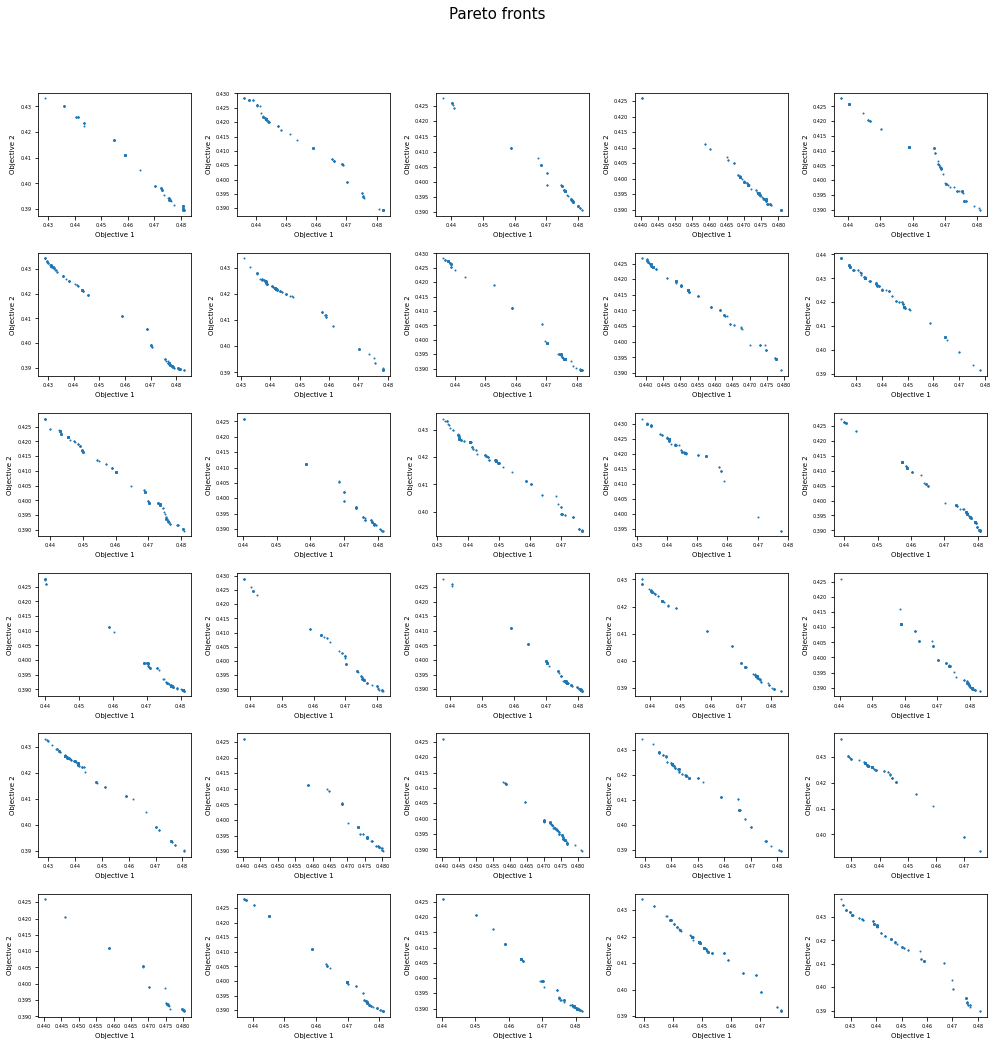

In [147]:
pareto_fronts('normalB099.json')

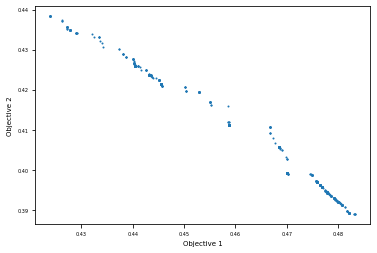

In [223]:
nondom099 = one_pareto_front('normalB099.json')

In [233]:
minim = 100000
for i in range(len(nondom099[0])):
    if np.abs(nondom099[0][i] - nondom099[1][i]) < minim:
        minim = np.abs(nondom099[0][i] - nondom099[1][i])
        minim_arg = i

0.00027968259041988297 645


In [ ]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol099[i][j][d], heights) - nondom099[0][645]) < epsilon) and (np.abs(-obj2(sol099[i][j][d], heights) - nondom099[1][645]) < epsilon):
                print ([i, j, d])

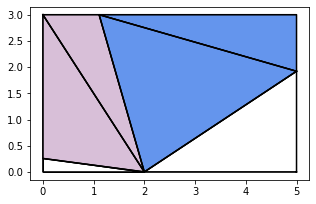

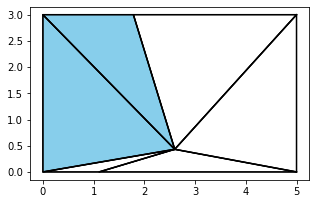

In [244]:
#Knee point
vis_poly(sol099[12][54][4])

In [258]:
min1 = 100000
for i in range(len(nondom099[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondom099[0][i]) < min1:
        min1 = np.abs(nondom099[0][i])
        min_arg1 = i
print(min1, min_arg1)

0.42400306666666665 475


In [262]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol099[i][j][d], heights) - nondom099[0][475]) < epsilon) and (np.abs(-obj2(sol099[i][j][d], heights) - nondom099[1][475]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
[9, 33, 8]
[9, 34, 9]
[9, 35, 6]
[9, 36, 3]
[9, 36, 6]
[9, 37, 3]
[9, 37, 4]
[9, 37, 6]
[9, 38, 9]
[9, 39, 7]
[9, 40, 8]
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


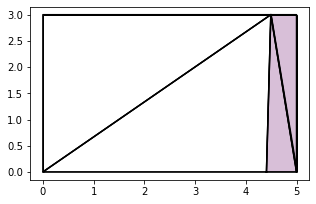

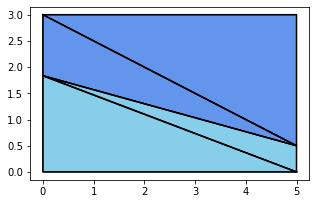

In [263]:
#Min_obj1:
vis_poly(sol099[9][33][8])

In [264]:
min2 = 100000
for i in range(len(nondom099[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondom099[1][i]) < min2:
        min2 = np.abs(nondom099[1][i])
        min_arg2 = i
print(min2, min_arg2)

0.3889556478862656 968


In [265]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol099[i][j][d], heights) - nondom099[0][968]) < epsilon) and (np.abs(-obj2(sol099[i][j][d], heights) - nondom099[1][968]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[18, 46, 6]
[18, 47, 6]
[18, 48, 5]
19
20
21
22
23
24
25
26
27
28
29


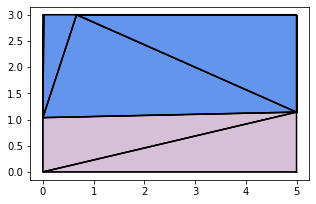

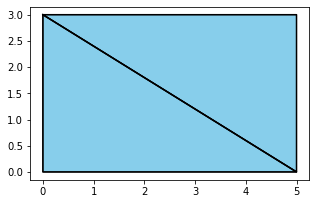

In [266]:
#Min obj2:
vis_poly(sol099[18][46][6])

In [152]:
df099 = df_correct_to_Andre('normalB099.json')

In [202]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([df099[k][i][0], df099[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("res099.txt", "w") as txt_file:
    txt_file.write(str(E))

## NSGA-II, mutation rate 0.3

In [267]:
import json
start_time = time.time()

a_fp = open('./normalB03.json', 'w')
b_fp = open('./normalD03.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init

    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        crowding_distance_values=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.3)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        crowding_distance_values2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)

    iteration +=1  
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

iteration 0
GENERATION 0


/Users/kseniapereverdieva/opt/anaconda3/envs/test/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/Users/kseniapereverdieva/opt/anaconda3/envs/test/lib/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30


/var/folders/79/2kx51r4n6mz47rr64pfr4nvc0000gn/T/ipykernel_59348/2174244004.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
/var/folders/79/2kx51r4n6mz47rr64pfr4nvc0000gn/T/ipykernel_59348/2174244004.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))


GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 1
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENE

GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 11
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GEN

GENERATION 59
iteration 20
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 21
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9


GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
--- 14107.029895067215 seconds ---


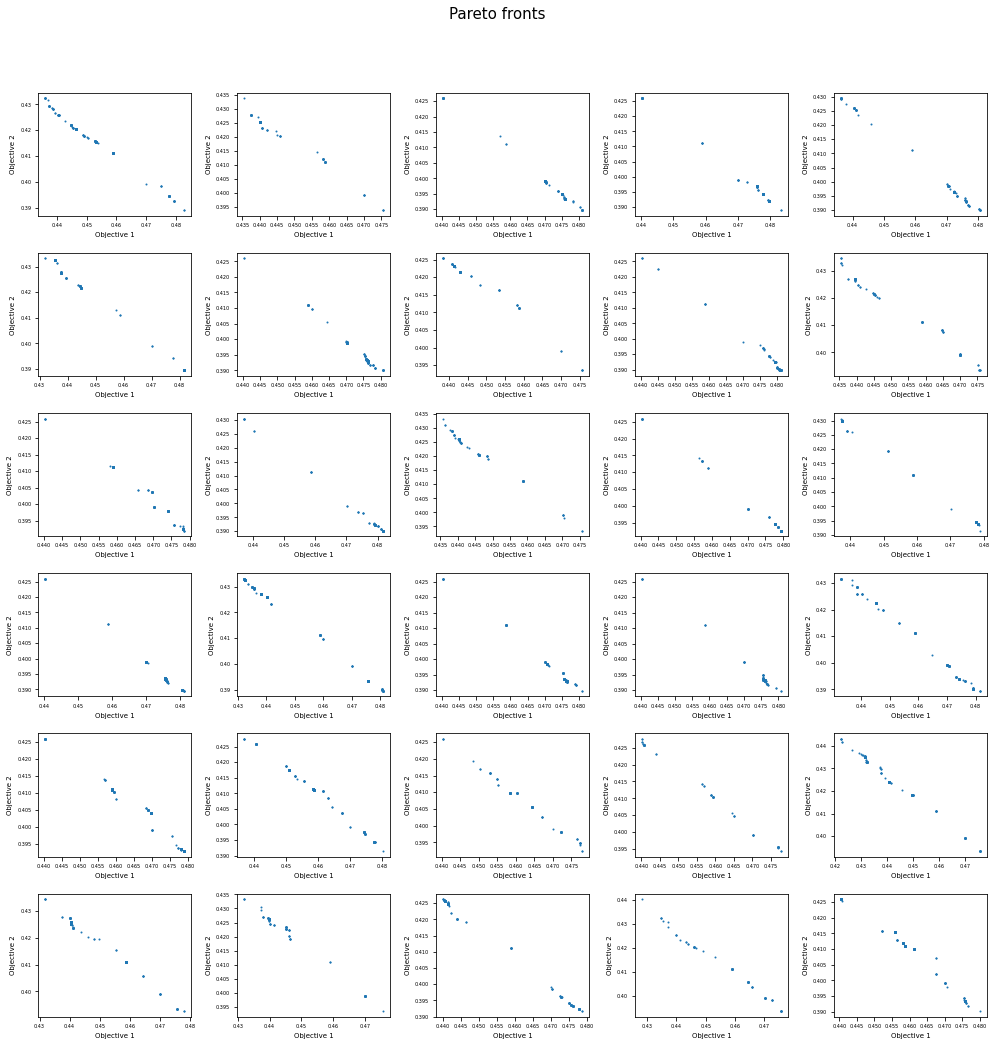

In [268]:
pareto_fronts('normalB03.json')

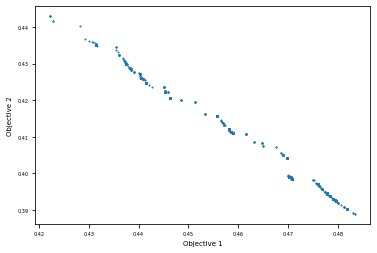

[array([0.4588304 , 0.4701092 , 0.4588304 , ..., 0.46757767, 0.4557224 ,
        0.46757767]),
 array([0.41111111, 0.39907407, 0.41111111, ..., 0.40730536, 0.41558403,
        0.40730536])]

In [269]:
one_pareto_front('normalB03.json')

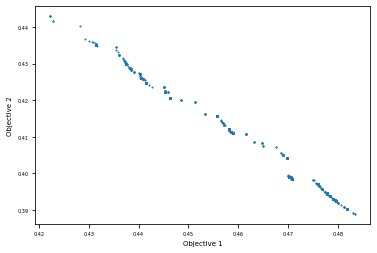

In [289]:
nondom03 = one_pareto_front('normalB03.json')

In [270]:
df03 = df_correct_to_Andre('normalB03.json')

In [271]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([df03[k][i][0], df03[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("res03.txt", "w") as txt_file:
    txt_file.write(str(E))

In [290]:
sol03 = sol('normalD03.json')

In [292]:
minim = 100000
for i in range(len(nondom03[0])):
    if np.abs(nondom03[0][i] - nondom03[1][i]) < minim:
        minim = np.abs(nondom03[0][i] - nondom03[1][i])
        minim_arg = i
print(minim, minim_arg)

0.0008555371749027763 703


In [293]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol03[i][j][d], heights) - nondom03[0][703]) < epsilon) and (np.abs(-obj2(sol03[i][j][d], heights) - nondom03[1][703]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
[9, 35, 2]
[9, 36, 3]
[9, 37, 3]
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


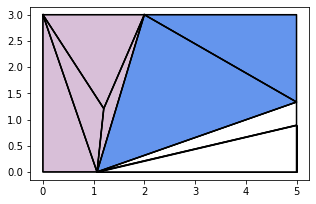

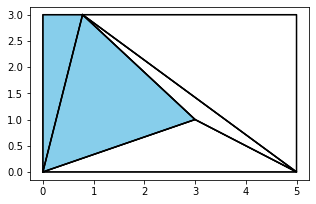

In [294]:
#Knee point
vis_poly(sol03[9][35][2])

In [295]:
min1 = 100000
for i in range(len(nondom03[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondom03[0][i]) < min1:
        min1 = np.abs(nondom03[0][i])
        min_arg1 = i
print(min1, min_arg1)

0.42234746666666667 2519


In [296]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol03[i][j][d], heights) - nondom03[0][2519]) < epsilon) and (np.abs(-obj2(sol03[i][j][d], heights) - nondom03[1][2519]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[24, 18, 0]
[24, 19, 1]
[24, 20, 9]
[24, 21, 2]
25
26
27
28
29


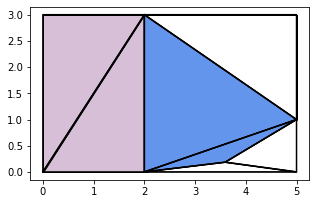

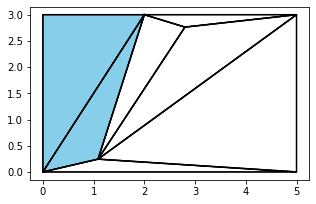

In [297]:
#Min_obj1:
vis_poly(sol03[24][18][0])

In [298]:
min2 = 100000
for i in range(len(nondom03[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondom03[1][i]) < min2:
        min2 = np.abs(nondom03[1][i])
        min_arg2 = i
print(min2, min_arg2)

0.3888981574539824 282


In [299]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(sol03[i][j][d], heights) - nondom03[0][282]) < epsilon) and (np.abs(-obj2(sol03[i][j][d], heights) - nondom03[1][282]) < epsilon):
                print ([i, j, d])

0
1
2
3
[3, 9, 0]
[3, 10, 1]
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


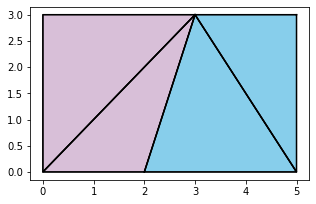

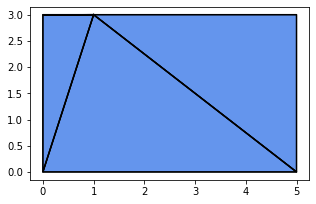

In [300]:
#Min obj2:
vis_poly(sol03[3][9][0])

## NSGA-II, mutation rate for continuous operator 0.8, for discrete and topological 0.1 (local search)

In [ ]:
start_time = time.time()

a_fp = open('./normalBdif.json', 'w')
b_fp = open('./normalDdif.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init

    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        crowding_distance_values=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.8)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        crowding_distance_values2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)
    iteration +=1
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)
               
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

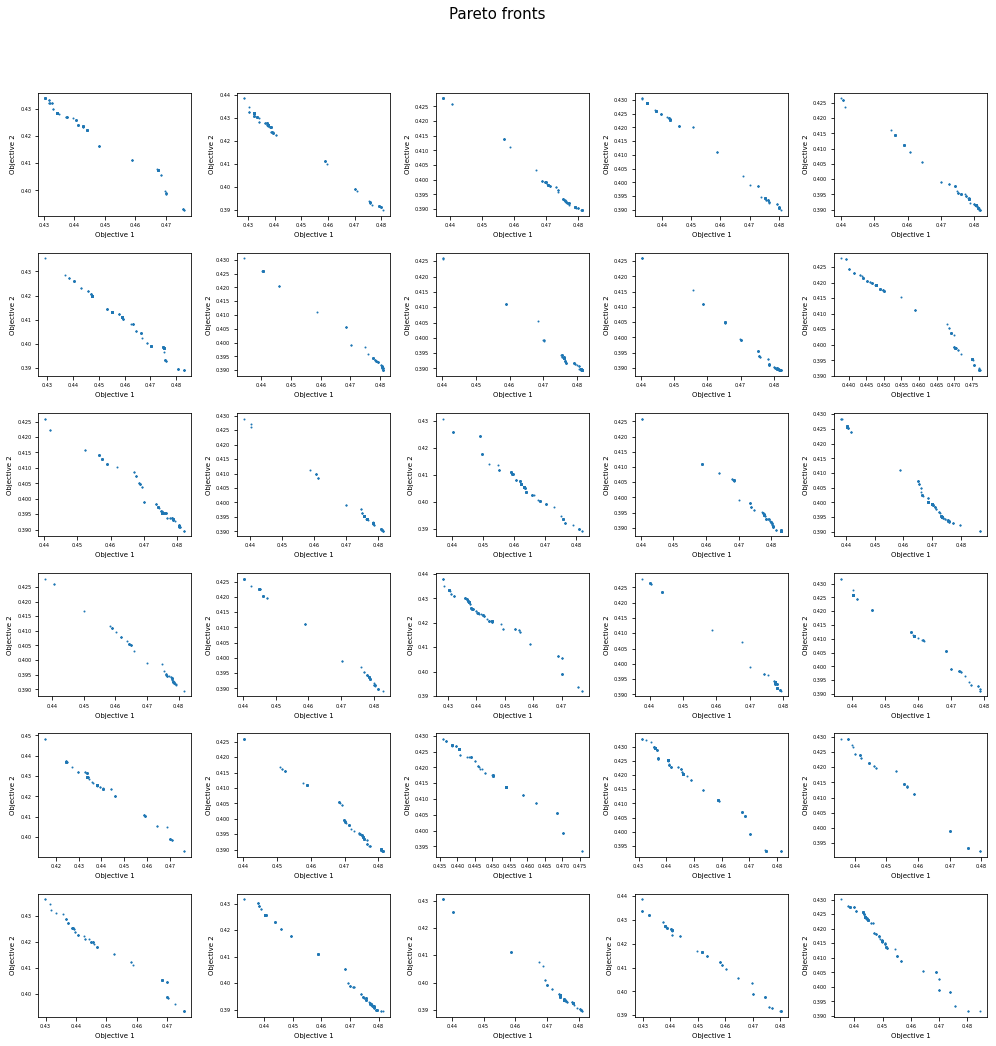

In [172]:
pareto_fronts('normalBdif.json')

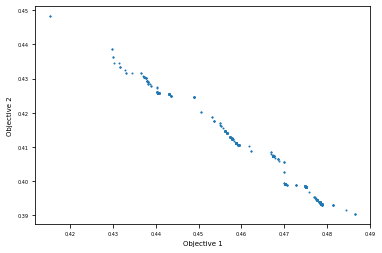

In [173]:
one_pareto_front('normalBdif.json')

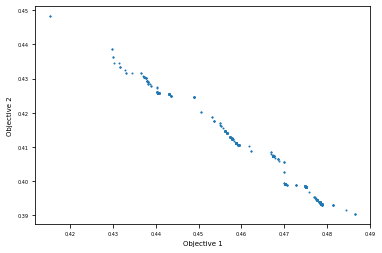

In [277]:
nondomdif = one_pareto_front('normalBdif.json')

In [137]:
dfdif = df_correct_to_Andre('normalBdif.json')

In [138]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([dfdif[k][i][0], dfdif[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("resdif.txt", "w") as txt_file:
    txt_file.write(str(E))

In [273]:
soldif = sol('normalDdif.json')

In [279]:
minim = 100000
for i in range(len(nondomdif[0])):
    if np.abs(nondomdif[0][i] - nondomdif[1][i]) < minim:
        minim = np.abs(nondomdif[0][i] - nondomdif[1][i])
        minim_arg = i
print(minim, minim_arg)

0.00032702208301521596 1002


In [280]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
            if (np.abs(-obj1(soldif[i][j][d], heights) - nondomdif[0][1002]) < epsilon) and (np.abs(-obj2(soldif[i][j][d], heights) - nondomdif[1][1002]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[23, 33, 8]
24
25
26
27
28
29


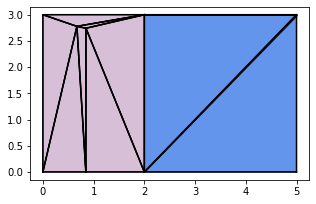

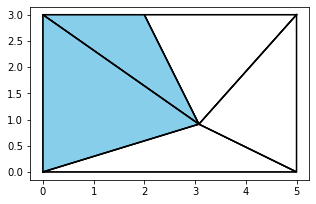

In [281]:
#Knee point
vis_poly(soldif[22][33][8])

In [282]:
min1 = 100000
for i in range(len(nondomdif[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondomdif[0][i]) < min1:
        min1 = np.abs(nondomdif[0][i])
        min_arg1 = i
print(min1, min_arg1)

0.41536046666666665 820


In [283]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(soldif[i][j][d], heights) - nondomdif[0][820]) < epsilon) and (np.abs(-obj2(soldif[i][j][d], heights) - nondomdif[1][820]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[20, 45, 3]
[20, 46, 6]
21
22
23
24
25
26
27
28
29


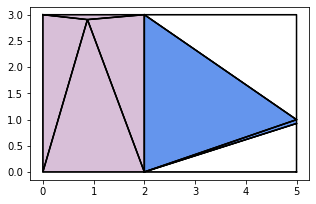

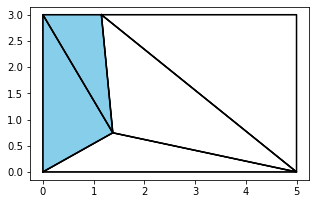

In [284]:
#Min_obj1:
vis_poly(soldif[20][45][3])

In [285]:
min2 = 100000
for i in range(len(nondomdif[0])):
#     print(np.abs(nondom099[0][i]))
    if np.abs(nondomdif[1][i]) < min2:
        min2 = np.abs(nondomdif[1][i])
        min_arg2 = i
print(min2, min_arg2)

0.39040417173655045 617


In [287]:
for i in range(30):
    print(i)
    for j in range(60):
        for d in range(10):
#             print(obj1(sol099[i][j][d], heights), obj2(sol099[i][j][d], heights))
            if (np.abs(-obj1(soldif[i][j][d], heights) - nondomdif[0][617]) < epsilon) and (np.abs(-obj2(soldif[i][j][d], heights) - nondomdif[1][617]) < epsilon):
                print ([i, j, d])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[14, 43, 6]
[14, 44, 0]
[14, 45, 1]
[14, 46, 1]
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


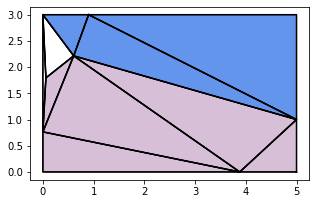

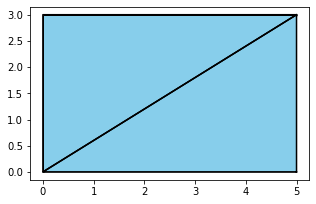

In [288]:
#Min obj2:
vis_poly(soldif[14][43][6])

## SMS-EMOA, mutation rate 0.99

iteration 0
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 1
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GE

GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 10
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GEN

GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 20
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GEN

GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59


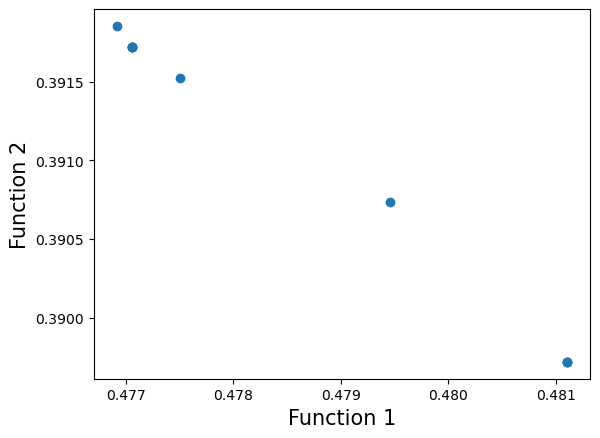

--- 19380.308307886124 seconds ---


In [125]:
start_time = time.time()

a_fp = open('./smsB099.json', 'w')
b_fp = open('./smsD099.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init
    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        hypervolume=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            hypervolume.append(hypervolumes(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.99)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        for i in range(len(function1_values2)):
            if function1_values2[i] is None:
                pass
                print(i, function1_values2[i], "None")
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]
        for i in range(len(function2_values2)):
            if function2_values2[i] is None:
                pass
                print(i, function2_values2[i], "None")

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        hypervolume2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            hypervolume2.append(hypervolumes(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], hypervolume2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)

    iteration +=1  
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

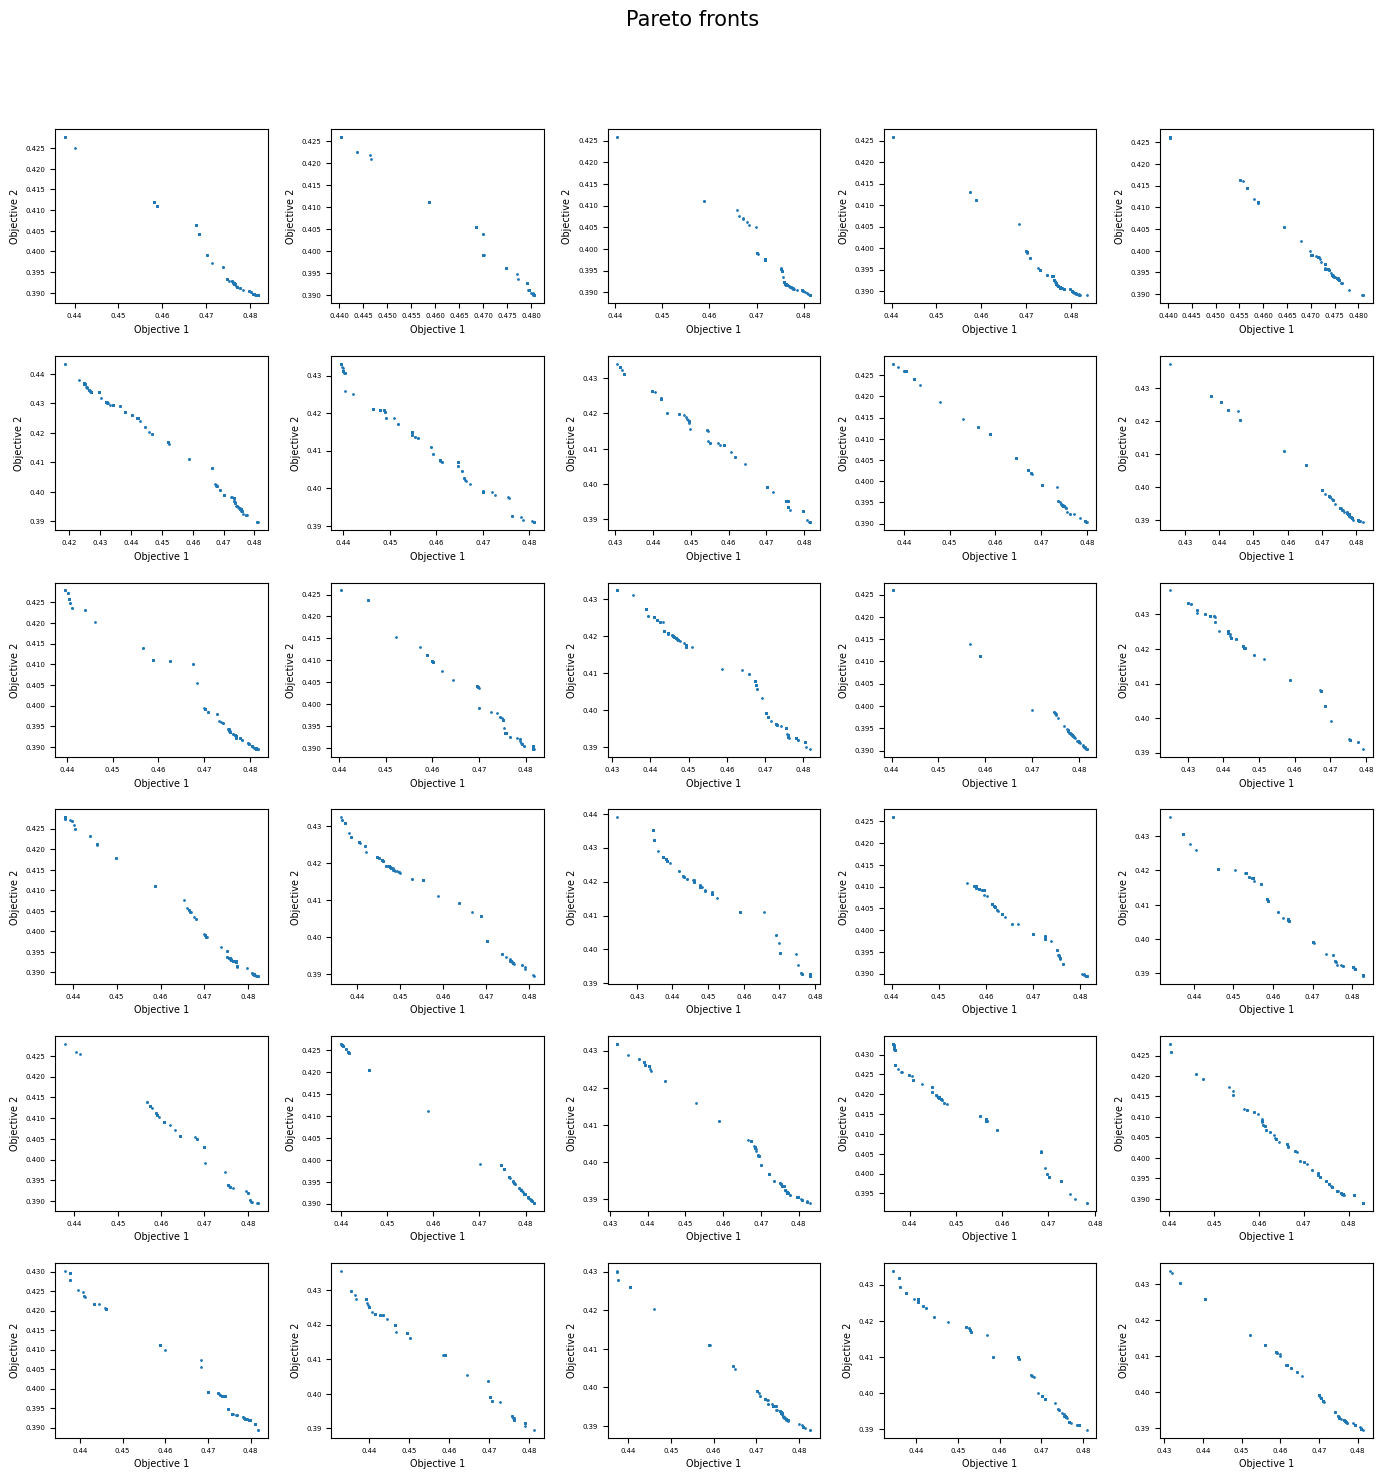

In [126]:
pareto_fronts('smsB099.json')

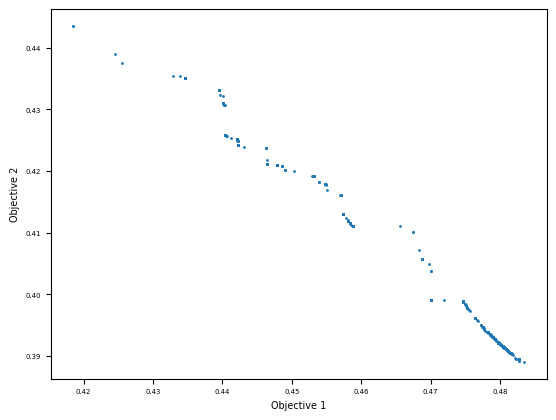

In [127]:
nondomsms099 = one_pareto_front('smsB099.json')

In [128]:
dfsms099 = df_correct_to_Andre('smsB099.json')

In [129]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([dfsms099[k][i][0], dfsms099[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("ressms099.txt", "w") as txt_file:
    txt_file.write(str(E))

## SMS-EMOA, mutation rate 0.3

In [148]:
start_time = time.time()

a_fp = open('./smsB03.json', 'w')
b_fp = open('./smsD03.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init

    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        hypervolume=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            hypervolume.append(hypervolumes(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.3)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        for i in range(len(function1_values2)):
            if function1_values2[i] is None:
                pass
                print(i, function1_values2[i], "None")
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]
        for i in range(len(function2_values2)):
            if function2_values2[i] is None:
                pass
                print(i, function2_values2[i], "None")

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        hypervolume2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            hypervolume2.append(hypervolumes(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], hypervolume2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)

    iteration +=1  
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

iteration 0
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 1
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GE

GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 10
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GEN

GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 20
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GEN

GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
--- 37913.39503574371 seconds ---


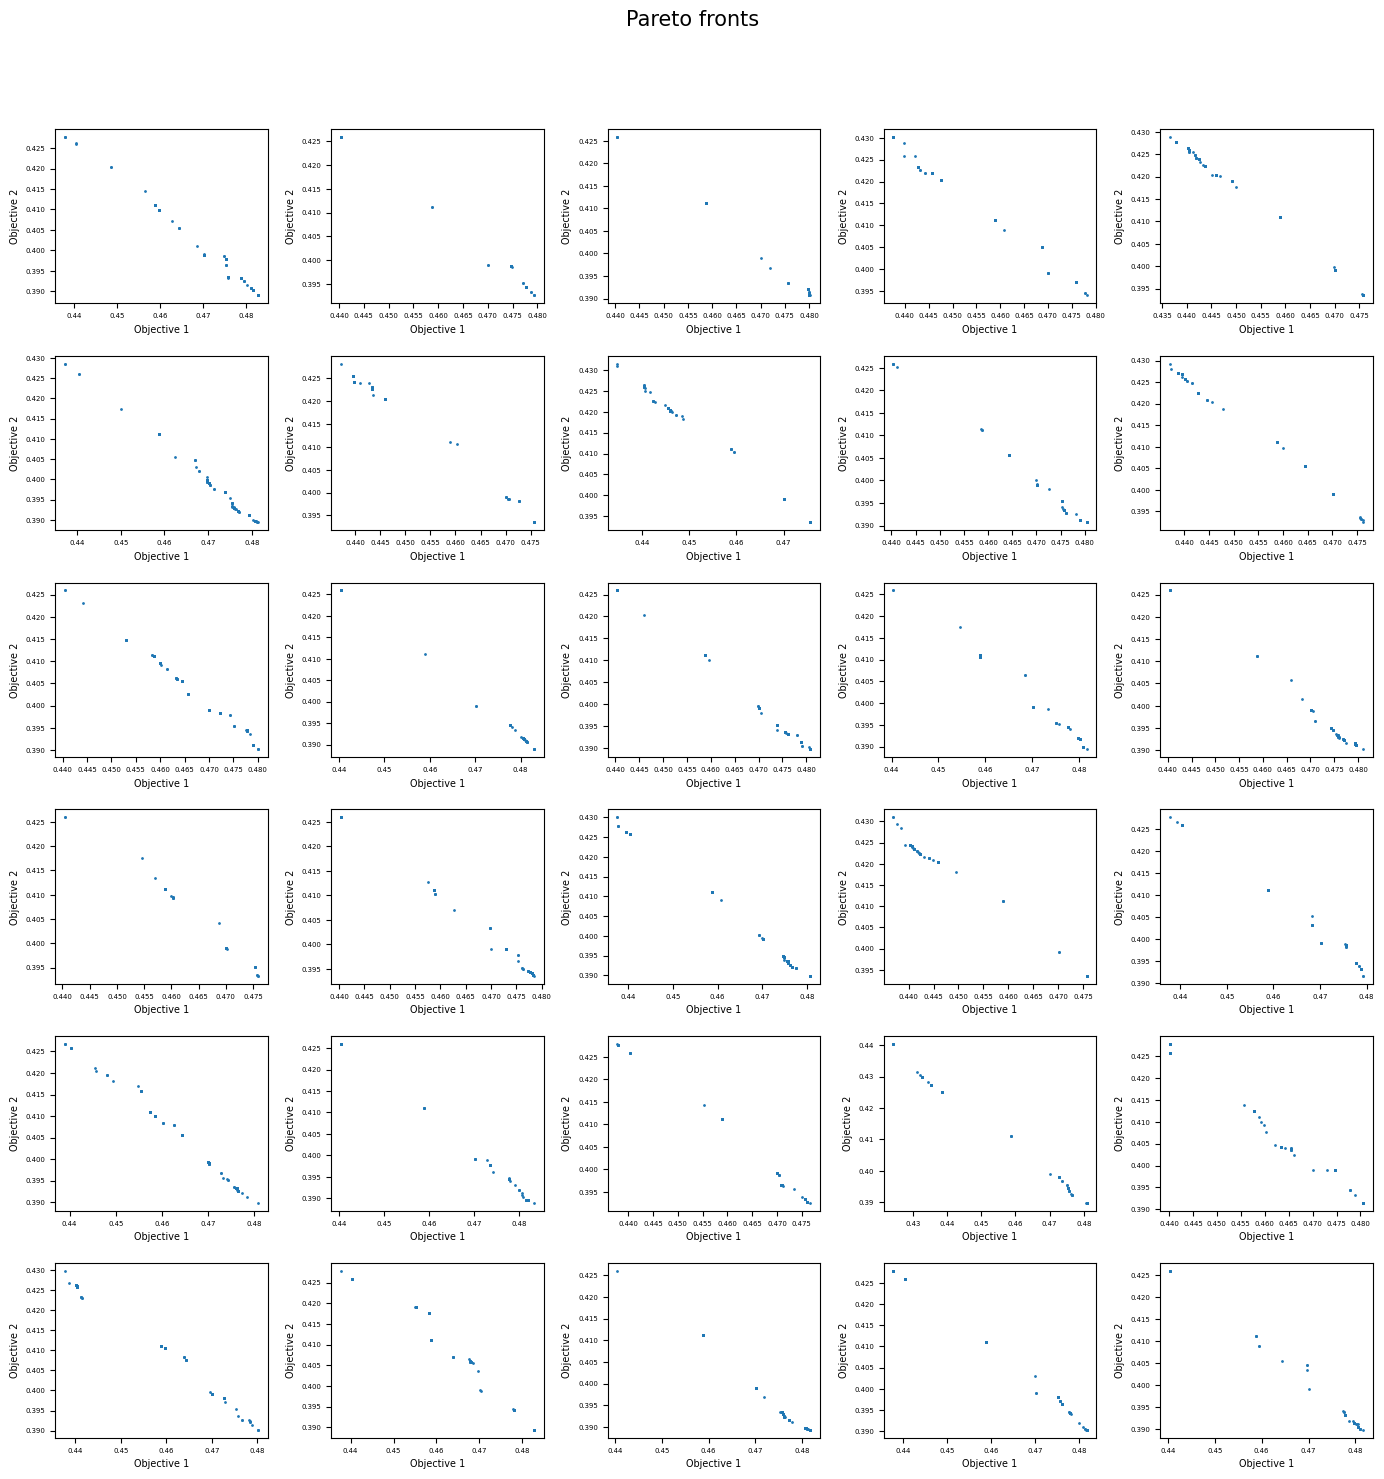

In [154]:
pareto_fronts('smsB03.json')

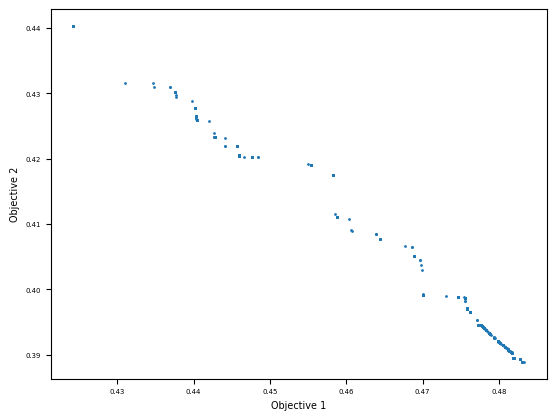

In [157]:
nondomsms03 = one_pareto_front('smsB03.json')

In [158]:
dfsms03 = df_correct_to_Andre('smsB03.json')

In [159]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([dfsms03[k][i][0], dfsms03[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("ressms03.txt", "w") as txt_file:
    txt_file.write(str(E))

## SMS-EMOA, mutation rate for continuous operator 0.8, for discrete and topological 0.1 (local search)

In [153]:
start_time = time.time()

a_fp = open('./smsBdif.json', 'w')
b_fp = open('./smsDdif.json', 'w')
iteration = 0
B = []
D = []
for iteration in range(30):
    print("iteration", iteration)
    #Main program starts here
    pop_size = 10
    max_gen = 60

    #Initialization
    min_x=-55
    max_x=55
    A = defaultdict()
    C = defaultdict()
    solution = poly_init

    gen_no=0
    while(gen_no<max_gen):
        print("GENERATION", gen_no)
        function1_values = [obj1(solution[i], heights) for i in range(0,pop_size)]
        function2_values = [obj2(solution[i], heights) for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
        hypervolume=[]

        for i in range(0,len(non_dominated_sorted_solution)):
            hypervolume.append(hypervolumes(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))

        solution2 = solution[:]


        #Generating offsprings
        while(len(solution2)!=2*pop_size):
            a1 = random.randint(0,pop_size-1)
            s = 0
            while s == 0:
                app = mutation(solution[a1], parameters, 0.1)
                if app is None:
                    pass
                else:
                    solution2.append(app)
                    s = 1

        function1_values2 = [obj1(solution2[i], heights) for i in range(0,2*pop_size)]
        for i in range(len(function1_values2)):
            if function1_values2[i] is None:
                pass
                print(i, function1_values2[i], "None")
        function2_values2 = [obj2(solution2[i], heights)for i in range(0,2*pop_size)]
        for i in range(len(function2_values2)):
            if function2_values2[i] is None:
                pass
                print(i, function2_values2[i], "None")

        A[gen_no] = [function1_values, function2_values]
        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        hypervolume2=[]

        for i in range(0,len(non_dominated_sorted_solution2)):
            hypervolume2.append(hypervolumes(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))


        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], hypervolume2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution] 
        C[gen_no] = solution
        gen_no = gen_no + 1
    B.append(A)   
    D.append(C)

    iteration +=1  
json.dump(B, a_fp)
json.dump(D, b_fp, cls=NpEncoder)
a_fp.close()
b_fp.close()

print("--- %s seconds ---" % (time.time() - start_time))

iteration 0
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 1
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GE

GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 10
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GEN

GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
iteration 20
GENERATION 0
GENERATION 1
GENERATION 2
GENERATION 3
GENERATION 4
GENERATION 5
GENERATION 6
GENERATION 7
GENERATION 8
GENERATION 9
GENERATION 10
GENERATION 11
GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GEN

GENERATION 12
GENERATION 13
GENERATION 14
GENERATION 15
GENERATION 16
GENERATION 17
GENERATION 18
GENERATION 19
GENERATION 20
GENERATION 21
GENERATION 22
GENERATION 23
GENERATION 24
GENERATION 25
GENERATION 26
GENERATION 27
GENERATION 28
GENERATION 29
GENERATION 30
GENERATION 31
GENERATION 32
GENERATION 33
GENERATION 34
GENERATION 35
GENERATION 36
GENERATION 37
GENERATION 38
GENERATION 39
GENERATION 40
GENERATION 41
GENERATION 42
GENERATION 43
GENERATION 44
GENERATION 45
GENERATION 46
GENERATION 47
GENERATION 48
GENERATION 49
GENERATION 50
GENERATION 51
GENERATION 52
GENERATION 53
GENERATION 54
GENERATION 55
GENERATION 56
GENERATION 57
GENERATION 58
GENERATION 59
--- 7269.958966970444 seconds ---


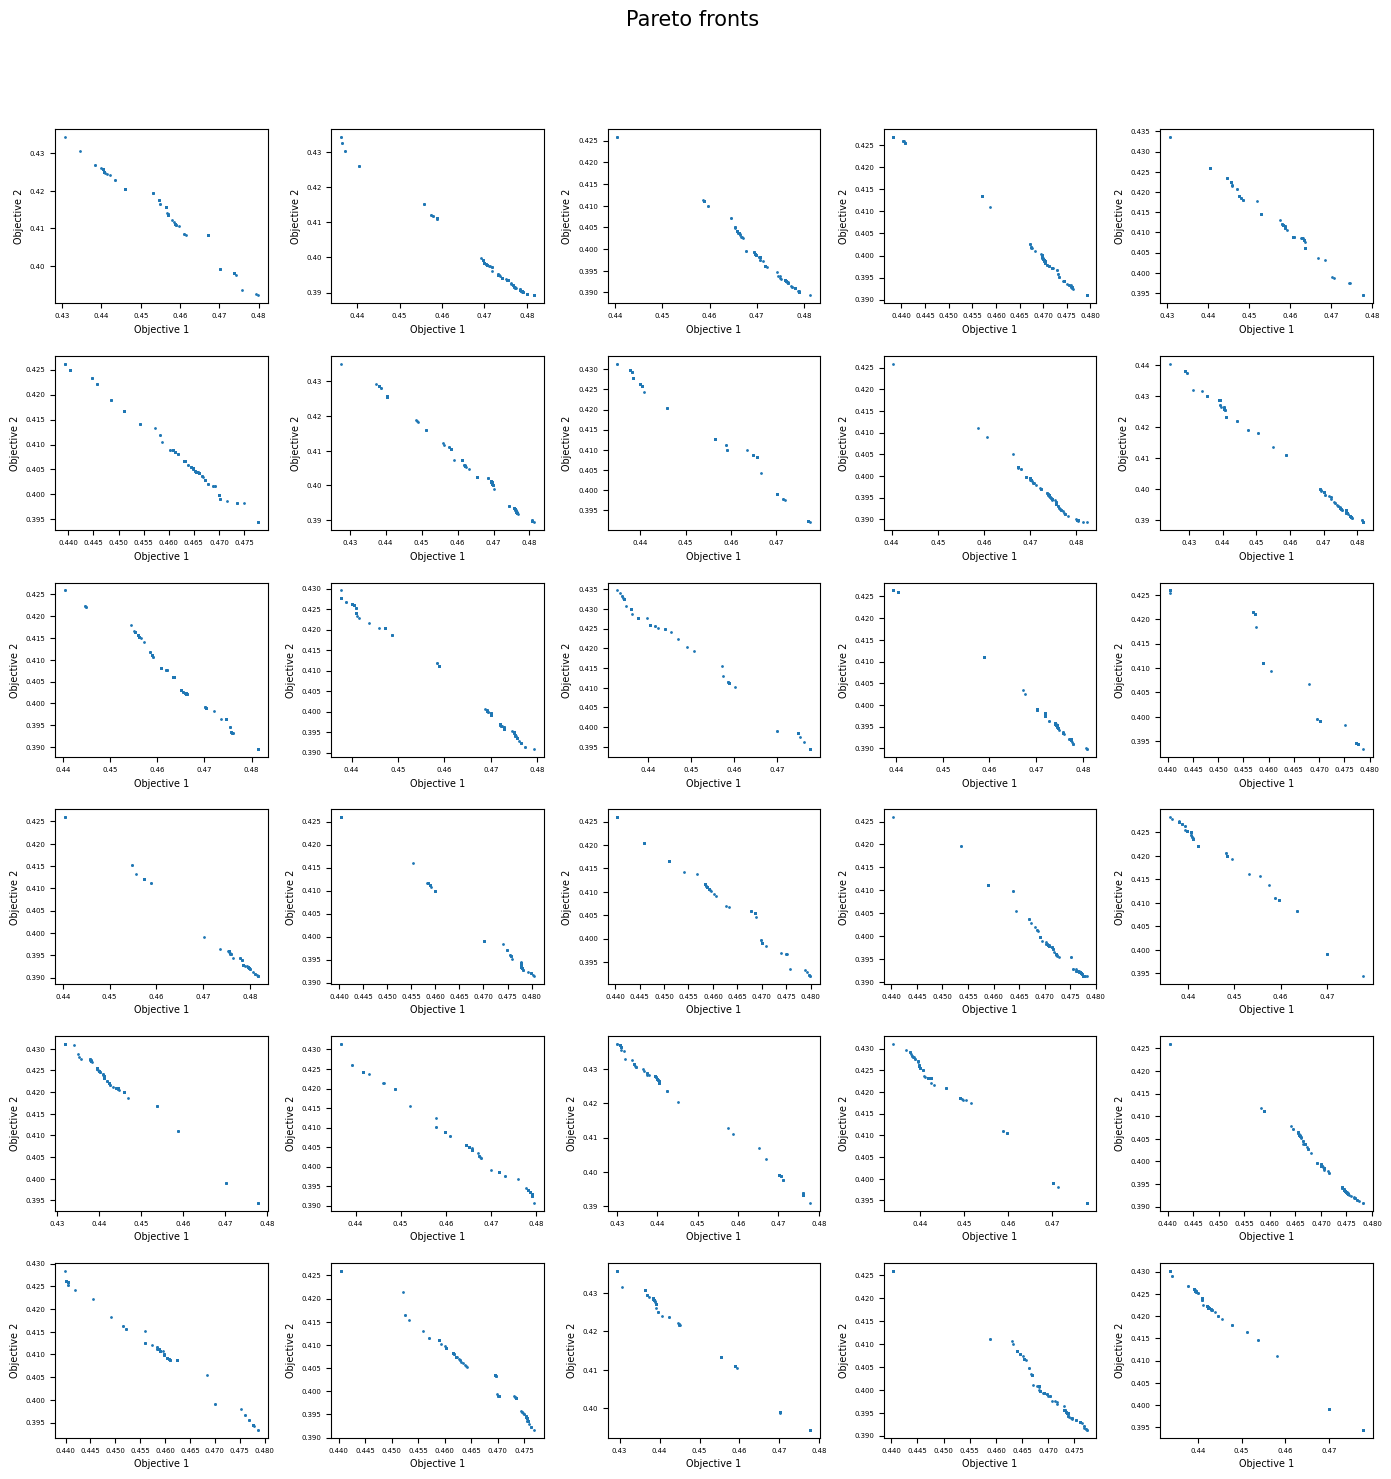

In [160]:
pareto_fronts('smsBdif.json')

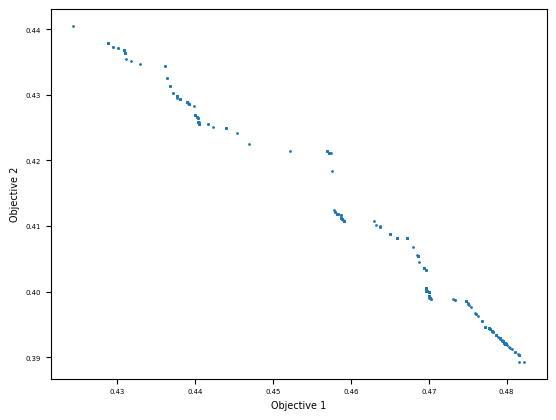

In [161]:
nondomsmsdif = one_pareto_front('smsBdif.json')

In [162]:
dfsmsdif = df_correct_to_Andre('smsBdif.json')

In [163]:
res = []
for k in range(30):
    A = []
    for i in range(60):
        A.append([dfsmsdif[k][i][0], dfsmsdif[k][i][1]])
    res.append(A)
E = []
for q in range(30):
    B = []
    C = non_dominated([x for y in [res[q][t][0] for t in range(1, 60)] for x in y], [x for y in [res[q][t][1] for t in range(1, 60)] for x in y])
    for p in range(60):
        B.append([C[0][p], C[1][p]])
    E.append(B)
with open("ressmsdif.txt", "w") as txt_file:
    txt_file.write(str(E))